# <center> Countries Life Expectancy </center>

The research on life expectancy in countries takes the spotlight in the notebook's machine learning model. Substantial data analysis and predictive algorithms are used to uncover the reasons causing differences in longevity among countries. With the aid of strong statistical tools, valuable insights into the complex link between healthcare, socioeconomic factors, and life expectancy are sought

About the features:-

Country-Country name(target variable)
Year-year of survey
Status-Status of the country's development(target variable)	
Population-Population of country	
Hepatitis B-Percentage of people finally one year old who were immunized against hepatitis B	
Measles-The number of reported measles cases per 1000 people	
Polio-Percentage of 1-year-olds immunized against polio	
Diphtheria-Percentage of people finally one year old who were immunized against diphtheria	
HIV/AIDS-The number of deaths caused by AIDS of the last 4-year-olds who were born alive per 1000 people	
infant deaths-The number of infant deaths per 1000 people
under-five deaths-The number of deaths of people under 5 years old per 1000 people	
Total expenditure-The ratio of government medical-health expenses to total government expenses in percentage	
GDP-Gross domestic product	
BMI-The average body mass index of the entire population of the country	
thinness 1-19 years-Prevalence of thinness among people 19 years old in percentage	
Alcohol-Liters of alcohol consumption among people over 15 years old	
Schooling-The number of years that people study	
Life expectancy-Country life expectancy(target variable)

Aim:-

The dataset aims to provide insights into the relationship between the non target features and the target features. Researchers and data analysts can use this dataset to explore the impact of Hepatitus B, Measles, Polio, Diphtheria and HIV/AIDS on the Life expectancy and GDP, Schooling and Population on the Status of the country.

## Importing all the libraries

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix
import geopandas as gpd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

## Uploading Life Expectancy csv file

In [219]:
df=pd.read_csv('life_expectancy.csv')

## First five rows of the dataset

In [220]:
df.head(5)

Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
0  Afghanistan  2015  Developing  33736494.0         65.0     1154    6.0   
1  Afghanistan  2014  Developing    327582.0         62.0      492   58.0   
2  Afghanistan  2013  Developing  31731688.0         64.0      430   62.0   
3  Afghanistan  2012  Developing   3696958.0         67.0     2787   67.0   
4  Afghanistan  2011  Developing   2978599.0         68.0     3013   68.0   

   Diphtheria  HIV/AIDS  infant deaths  under-five deaths  Total expenditure  \
0        65.0       0.1             62                 83               8.16   
1        62.0       0.1             64                 86               8.18   
2        64.0       0.1             66                 89               8.13   
3        67.0       0.1             69                 93               8.52   
4        68.0       0.1             71                 97               7.87   

          GDP   BMI  thinness  1-19 years  Alcohol  Schooling  Life expectancy  
0  584.259210  19.1                  17.2     0.01       10.1             65.0  
1  612.696514  18.6                  17.5     0.01       10.0             59.9  
2  631.744976  18.1                  17.7     0.01        9.9             59.9  
3  669.959000  17.6                  17.9     0.01        9.8             59.5  
4   63.537231  17.2                  18.2     0.01        9.5             59.2

## Information about the columns of the dataset

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2204 non-null   float64
 4   Hepatitis B           2306 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2829 non-null   float64
 7   Diphtheria            2829 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2627 non-null   float64
 12  GDP                   2406 non-null   float64
 13  BMI                   2816 non-null   float64
 14  thinness  1-19 years  2816 non-null   float64
 15  Alcohol              

## Description of the columns of the dataset

In [222]:
df.describe()

Year    Population  Hepatitis B        Measles        Polio  \
count  2848.000000  2.204000e+03  2306.000000    2848.000000  2829.000000   
mean   2007.500000  1.283457e+07    81.076756    2083.082163    82.682220   
std       4.610582  6.196094e+07    25.019068   10249.107207    23.434954   
min    2000.000000  3.400000e+01     1.000000       0.000000     3.000000   
25%    2003.750000  1.967585e+05    77.000000       0.000000    78.000000   
50%    2007.500000  1.391756e+06    92.000000      16.000000    93.000000   
75%    2011.250000  7.438947e+06    97.000000     336.750000    97.000000   
max    2015.000000  1.293859e+09    99.000000  212183.000000    99.000000   

        Diphtheria     HIV/AIDS  infant deaths  under-five deaths  \
count  2829.000000  2848.000000    2848.000000        2848.000000   
mean     82.451396     1.756461      28.359902          39.500000   
std      23.693936     5.148935     117.188032         159.800866   
min       2.000000     0.100000       0.000000           0.000000   
25%      78.000000     0.100000       0.000000           0.000000   
50%      93.000000     0.100000       3.000000           4.000000   
75%      97.000000     0.700000      20.000000          25.000000   
max      99.000000    50.600000    1800.000000        2500.000000   

       Total expenditure            GDP          BMI  thinness  1-19 years  \
count        2627.000000    2406.000000  2816.000000           2816.000000   
mean            5.935577    7664.398813    38.503374              4.847230   
std             2.504439   14466.241793    19.955485              4.443695   
min             0.370000       1.681350     1.000000              0.100000   
25%             4.240000     477.541713    19.500000              1.600000   
50%             5.760000    1841.086830    43.900000              3.300000   
75%             7.530000    6265.658907    56.200000              7.125000   
max            17.600000  119172.741800    77.600000             27.700000   

           Alcohol    Schooling  Life expectancy  
count  2660.000000  2688.000000      2848.000000  
mean      4.638932    12.060156        69.347402  
std       4.064721     3.320160         9.528332  
min       0.010000     0.000000        36.300000  
25%       0.930000    10.200000        63.500000  
50%       3.785000    12.400000        72.200000  
75%       7.810000    14.300000        75.800000  
max      17.870000    20.700000        89.000000

## Cleaning

### Checking if columns to be cleaned

In [223]:
df.isnull().sum()

Country                   0
Year                      0
Status                    0
Population              644
Hepatitis B             542
Measles                   0
Polio                    19
Diphtheria               19
HIV/AIDS                  0
infant deaths             0
under-five deaths         0
Total expenditure       221
GDP                     442
BMI                      32
thinness  1-19 years     32
Alcohol                 188
Schooling               160
Life expectancy           0
dtype: int64

### Heatmap showing the null values in the columns

<AxesSubplot:>

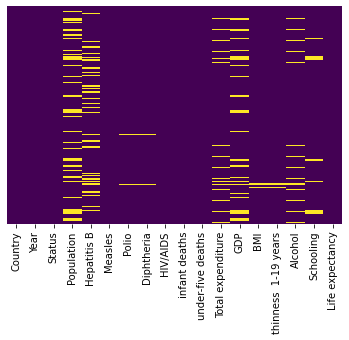

In [224]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Columns of the dataset

In [225]:
df.columns

Index(['Country', 'Year', 'Status', 'Population', 'Hepatitis B', 'Measles',
       'Polio', 'Diphtheria', 'HIV/AIDS', 'infant deaths', 'under-five deaths',
       'Total expenditure', 'GDP', 'BMI', 'thinness  1-19 years', 'Alcohol',
       'Schooling', 'Life expectancy'],
      dtype='object')

### Population

#### First five rows of dataset having null value in population column

In [226]:
df[df['Population'].isnull()].head(5)

Country  Year      Status  Population  Hepatitis B  Measles  \
64  Antigua and Barbuda  2015  Developing         NaN         99.0        0   
65  Antigua and Barbuda  2014  Developing         NaN         99.0        0   
66  Antigua and Barbuda  2013  Developing         NaN         99.0        0   
67  Antigua and Barbuda  2012  Developing         NaN         98.0        0   
68  Antigua and Barbuda  2011  Developing         NaN         99.0        0   

    Polio  Diphtheria  HIV/AIDS  infant deaths  under-five deaths  \
64   86.0        99.0       0.2              0                  0   
65   96.0        99.0       0.2              0                  0   
66   98.0        99.0       0.2              0                  0   
67   97.0        98.0       0.2              0                  0   
68   99.0        99.0       0.1              0                  0   

    Total expenditure          GDP   BMI  thinness  1-19 years  Alcohol  \
64                NaN  13566.95410  47.7                   3.3      NaN   
65               5.54  12888.29667  47.0                   3.3     8.56   
66               5.33  12224.86416  46.4                   3.3     8.58   
67               5.39  12565.44197  45.7                   3.3     8.18   
68               5.65  11929.34991  45.1                   3.3     7.84   

    Schooling  Life expectancy  
64       13.9             76.4  
65       13.9             76.2  
66       13.9             76.1  
67       13.8             75.9  
68       14.1             75.7

#### Handling the null values

In [227]:
df['Population'].fillna(df['Population'].mean(),inplace=True)

We are filling it with the mean of the column since it contains numerical data.

#### Heatmap showing the null values in the columns

<AxesSubplot:>

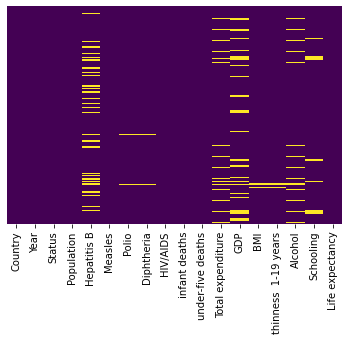

In [228]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As there are no more null values in Population column, the column does not require further data cleaning.

### Hepatitis B

#### First five rows of dataset having null value in Hepatitis column

In [229]:
df[df['Hepatitis B'].isnull()].head(5)

Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
44  Algeria  2003  Developing   3243514.0          NaN    15374   87.0   
45  Algeria  2002  Developing   3199546.0          NaN     5862   86.0   
46  Algeria  2001  Developing  31592153.0          NaN     2686   89.0   
47  Algeria  2000  Developing   3118366.0          NaN        0   86.0   
57   Angola  2006  Developing   2262399.0          NaN      765   36.0   

    Diphtheria  HIV/AIDS  infant deaths  under-five deaths  Total expenditure  \
44        87.0       0.1             20                 23               3.60   
45        86.0       0.1             20                 23               3.73   
46        89.0       0.1             20                 24               3.84   
47        86.0       0.1             21                 25               3.49   
57        34.0       2.5             90                143               4.54   

            GDP   BMI  thinness  1-19 years  Alcohol  Schooling  \
44   294.335560  47.0                   6.3     0.34       11.5   
45  1774.336730  46.1                   6.3     0.36       11.1   
46  1732.857979  45.3                   6.4     0.23       10.9   
47  1757.177970  44.4                   6.5     0.25       10.7   
57   262.415149  18.2                   9.8     5.84        7.2   

    Life expectancy  
44             71.7  
45             71.6  
46             71.4  
47             71.3  
57             47.7

#### Handling the null values

In [230]:
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(),inplace=True)

We are filling it with the mean of the column since it contains numerical data.

#### Heatmap showing the null values in the columns

<AxesSubplot:>

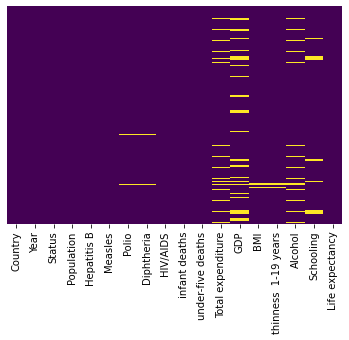

In [231]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As there are no more null values in Hepatitis B column, the column does not require further data cleaning.

### Polio

#### First five rows of dataset having null value in Polio column

In [232]:
df[df['Polio'].isnull()].head(5)

Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
1674  Montenegro  2005  Developing    614261.0    81.076756        0    NaN   
1675  Montenegro  2004  Developing    613353.0    81.076756        0    NaN   
1676  Montenegro  2003  Developing    612267.0    81.076756        0    NaN   
1677  Montenegro  2002  Developing     69828.0    81.076756        0    NaN   
1678  Montenegro  2001  Developing     67389.0    81.076756        0    NaN   

      Diphtheria  HIV/AIDS  infant deaths  under-five deaths  \
1674         NaN       0.1              0                  0   
1675         NaN       0.1              0                  0   
1676         NaN       0.1              0                  0   
1677         NaN       0.1              0                  0   
1678         NaN       0.1              0                  0   

      Total expenditure          GDP   BMI  thinness  1-19 years  Alcohol  \
1674               8.46  3674.617924  55.7                   2.3      NaN   
1675               8.45   338.199535  55.0                   2.3     0.01   
1676               8.91  2789.173500  54.2                   2.4     0.01   
1677               8.33   216.243274  53.5                   2.5     0.01   
1678               8.23   199.583957  52.7                   2.5     0.01   

      Schooling  Life expectancy  
1674       12.8             73.6  
1675       12.6             73.5  
1676        0.0             73.5  
1677        0.0             73.4  
1678        0.0             73.3

#### Handling the null values

In [233]:
df['Polio'].fillna(df['Polio'].mean(),inplace=True)

We are filling it with the mean of the column since it contains numerical data.

#### Heatmap showing the null values in the columns

<AxesSubplot:>

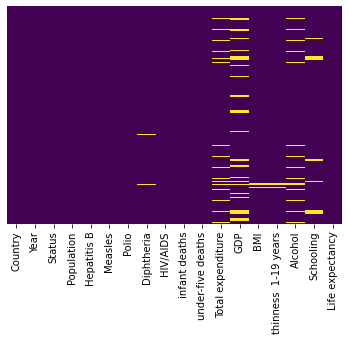

In [234]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As there are no more null values in Polio column, the column does not require further data cleaning.

### Diphtheria

#### First five rows of dataset having null value in Diphtheria column

In [235]:
df[df['Diphtheria'].isnull()].head(5)

Country  Year      Status  Population  Hepatitis B  Measles  \
1674  Montenegro  2005  Developing    614261.0    81.076756        0   
1675  Montenegro  2004  Developing    613353.0    81.076756        0   
1676  Montenegro  2003  Developing    612267.0    81.076756        0   
1677  Montenegro  2002  Developing     69828.0    81.076756        0   
1678  Montenegro  2001  Developing     67389.0    81.076756        0   

         Polio  Diphtheria  HIV/AIDS  infant deaths  under-five deaths  \
1674  82.68222         NaN       0.1              0                  0   
1675  82.68222         NaN       0.1              0                  0   
1676  82.68222         NaN       0.1              0                  0   
1677  82.68222         NaN       0.1              0                  0   
1678  82.68222         NaN       0.1              0                  0   

      Total expenditure          GDP   BMI  thinness  1-19 years  Alcohol  \
1674               8.46  3674.617924  55.7                   2.3      NaN   
1675               8.45   338.199535  55.0                   2.3     0.01   
1676               8.91  2789.173500  54.2                   2.4     0.01   
1677               8.33   216.243274  53.5                   2.5     0.01   
1678               8.23   199.583957  52.7                   2.5     0.01   

      Schooling  Life expectancy  
1674       12.8             73.6  
1675       12.6             73.5  
1676        0.0             73.5  
1677        0.0             73.4  
1678        0.0             73.3

#### Handling the null values

In [236]:
df['Diphtheria'].fillna(df['Diphtheria'].mean(),inplace=True)

We are filling it with the mean of the column since it contains numerical data.

#### Heatmap showing the null values in the columns

<AxesSubplot:>

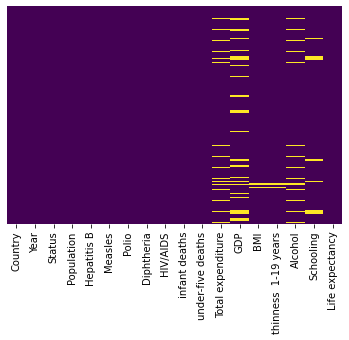

In [237]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As there are no more null values in Diptheria column, the column does not require further data cleaning.

### Total expenditure

#### First five rows of dataset having null value in Total expenditure column

In [238]:
df[df['Total expenditure'].isnull()].head(5)

Country  Year      Status    Population  Hepatitis B  Measles  \
32              Algeria  2015  Developing  3.987153e+07         95.0       63   
48               Angola  2015  Developing  2.785935e+06         64.0      118   
64  Antigua and Barbuda  2015  Developing  1.283457e+07         99.0        0   
80            Argentina  2015  Developing  4.341776e+07         94.0        0   
96              Armenia  2015  Developing  2.916950e+05         94.0       33   

    Polio  Diphtheria  HIV/AIDS  infant deaths  under-five deaths  \
32   95.0        95.0       0.1             21                 24   
48    7.0        64.0       1.9             66                 98   
64   86.0        99.0       0.2              0                  0   
80   93.0        94.0       0.1              8                  9   
96   96.0        94.0       0.1              1                  1   

    Total expenditure           GDP   BMI  thinness  1-19 years  Alcohol  \
32                NaN   4132.762920  59.5                   6.0      NaN   
48                NaN   3695.793748  23.3                   8.3      NaN   
64                NaN  13566.954100  47.7                   3.3      NaN   
80                NaN  13467.123600  62.8                   1.0      NaN   
96                NaN    369.654776  54.9                   2.1      NaN   

    Schooling  Life expectancy  
32       14.4             75.6  
48       11.4             52.4  
64       13.9             76.4  
80       17.3             76.3  
96       12.7             74.8

#### Handling the null values

In [239]:
df['Total expenditure'].fillna(df['Total expenditure'].mean() ,inplace=True)

We are filling it with the mean of the column since it contains numerical data.

#### Heatmap showing the null values in the columns

<AxesSubplot:>

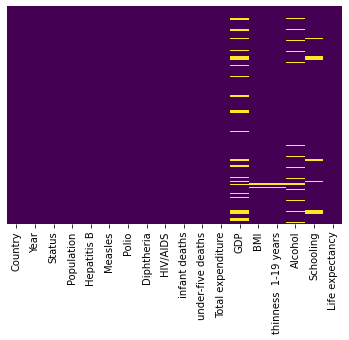

In [240]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As there are no more null values in Total expenditure column, the column does not require further data cleaning.

### GDP

#### First five rows of dataset having null value in GDP column

In [241]:
df[df['GDP'].isnull()].head(5)

Country  Year      Status    Population  Hepatitis B  Measles  Polio  \
160  Bahamas  2015  Developing  1.283457e+07         95.0        0   95.0   
161  Bahamas  2014  Developing  1.283457e+07         96.0        0   96.0   
162  Bahamas  2013  Developing  1.283457e+07         97.0        0   97.0   
163  Bahamas  2012  Developing  1.283457e+07         96.0        0   99.0   
164  Bahamas  2011  Developing  1.283457e+07         95.0        0   97.0   

     Diphtheria  HIV/AIDS  infant deaths  under-five deaths  \
160        95.0       0.1              0                  0   
161        96.0       0.1              0                  0   
162        97.0       0.1              0                  0   
163        98.0       0.2              0                  0   
164        98.0       0.1              0                  0   

     Total expenditure  GDP   BMI  thinness  1-19 years  Alcohol  Schooling  \
160           5.935577  NaN  64.5                   2.5      NaN       12.6   
161           7.740000  NaN  63.8                   2.5     9.45       12.6   
162           7.500000  NaN  63.2                   2.5     9.42       12.6   
163           7.430000  NaN  62.6                   2.5     9.50       12.6   
164           7.630000  NaN  62.0                   2.5     9.34       12.6   

     Life expectancy  
160             76.1  
161             75.4  
162             74.8  
163             74.9  
164             75.0

#### Handling the null values

In [242]:
df['GDP'].fillna(df['GDP'].mean(),inplace=True)

We are filling it with the mean of the column since it contains numerical data.

#### Heatmap showing the null values in the columns

<AxesSubplot:>

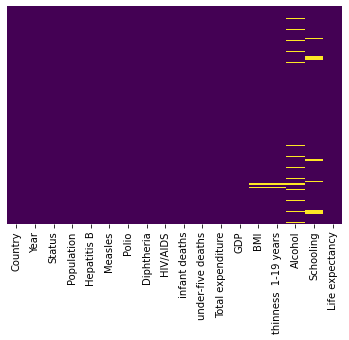

In [243]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As there are no more null values in GDP column, the column does not require further data cleaning.

### BMI

#### First five rows of dataset having null value in BMI column

In [244]:
df[df['BMI'].isnull()].head(5)

Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
2320  South Sudan  2015  Developing  11882136.0    31.000000      878   41.0   
2321  South Sudan  2014  Developing   1153971.0    81.076756      441   44.0   
2322  South Sudan  2013  Developing   1117749.0    81.076756      525    5.0   
2323  South Sudan  2012  Developing   1818258.0    81.076756     1952   64.0   
2324  South Sudan  2011  Developing   1448857.0    81.076756     1256   66.0   

      Diphtheria  HIV/AIDS  infant deaths  under-five deaths  \
2320        31.0       3.4             26                 39   
2321        39.0       3.5             26                 39   
2322        45.0       3.6             26                 40   
2323        59.0       3.8             26                 40   
2324        61.0       3.9             27                 41   

      Total expenditure          GDP  BMI  thinness  1-19 years  Alcohol  \
2320           5.935577   758.725782  NaN                   NaN      NaN   
2321           2.740000  1151.861715  NaN                   NaN      NaN   
2322           2.620000  1186.113250  NaN                   NaN      NaN   
2323           2.770000   958.455810  NaN                   NaN      NaN   
2324           5.935577   176.971300  NaN                   NaN      NaN   

      Schooling  Life expectancy  
2320        4.9             57.3  
2321        4.9             56.6  
2322        4.9             56.4  
2323        4.9             56.0  
2324        4.9             55.4

#### Handling the null values

In [245]:
df['BMI'].fillna(df['BMI'].mean(),inplace=True)

We are filling it with the mean of the column since it contains numerical data.

#### Heatmap showing the null values in the columns

<AxesSubplot:>

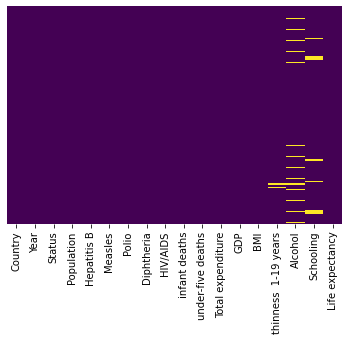

In [246]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As there are no more null values in BMI column, the column does not require further data cleaning.

### thinness 1-19 years

#### First five rows of dataset having null value in thinness 1-19 years column

In [247]:
df[df['thinness  1-19 years'].isnull()].head(5)

Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
2320  South Sudan  2015  Developing  11882136.0    31.000000      878   41.0   
2321  South Sudan  2014  Developing   1153971.0    81.076756      441   44.0   
2322  South Sudan  2013  Developing   1117749.0    81.076756      525    5.0   
2323  South Sudan  2012  Developing   1818258.0    81.076756     1952   64.0   
2324  South Sudan  2011  Developing   1448857.0    81.076756     1256   66.0   

      Diphtheria  HIV/AIDS  infant deaths  under-five deaths  \
2320        31.0       3.4             26                 39   
2321        39.0       3.5             26                 39   
2322        45.0       3.6             26                 40   
2323        59.0       3.8             26                 40   
2324        61.0       3.9             27                 41   

      Total expenditure          GDP        BMI  thinness  1-19 years  \
2320           5.935577   758.725782  38.503374                   NaN   
2321           2.740000  1151.861715  38.503374                   NaN   
2322           2.620000  1186.113250  38.503374                   NaN   
2323           2.770000   958.455810  38.503374                   NaN   
2324           5.935577   176.971300  38.503374                   NaN   

      Alcohol  Schooling  Life expectancy  
2320      NaN        4.9             57.3  
2321      NaN        4.9             56.6  
2322      NaN        4.9             56.4  
2323      NaN        4.9             56.0  
2324      NaN        4.9             55.4

#### Handling the null values

In [248]:
df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].mean(),inplace=True)

We are filling it with the mean of the column since it contains numerical data.

#### Heatmap showing the null values in the columns

<AxesSubplot:>

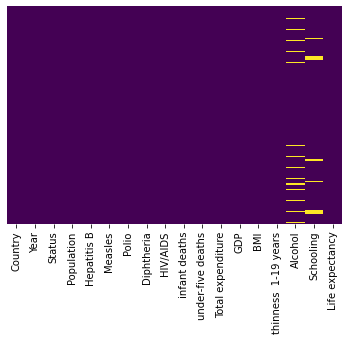

In [249]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As there are no more null values in thinness 1-19 years column, the column does not require further data cleaning.

### Alcohol

#### First five rows of dataset having null value in Alcohol column

In [250]:
df[df['Alcohol'].isnull()].head(5)

Country  Year      Status    Population  Hepatitis B  Measles  \
32              Algeria  2015  Developing  3.987153e+07         95.0       63   
48               Angola  2015  Developing  2.785935e+06         64.0      118   
64  Antigua and Barbuda  2015  Developing  1.283457e+07         99.0        0   
80            Argentina  2015  Developing  4.341776e+07         94.0        0   
96              Armenia  2015  Developing  2.916950e+05         94.0       33   

    Polio  Diphtheria  HIV/AIDS  infant deaths  under-five deaths  \
32   95.0        95.0       0.1             21                 24   
48    7.0        64.0       1.9             66                 98   
64   86.0        99.0       0.2              0                  0   
80   93.0        94.0       0.1              8                  9   
96   96.0        94.0       0.1              1                  1   

    Total expenditure           GDP   BMI  thinness  1-19 years  Alcohol  \
32           5.935577   4132.762920  59.5                   6.0      NaN   
48           5.935577   3695.793748  23.3                   8.3      NaN   
64           5.935577  13566.954100  47.7                   3.3      NaN   
80           5.935577  13467.123600  62.8                   1.0      NaN   
96           5.935577    369.654776  54.9                   2.1      NaN   

    Schooling  Life expectancy  
32       14.4             75.6  
48       11.4             52.4  
64       13.9             76.4  
80       17.3             76.3  
96       12.7             74.8

#### Handling the null values

In [251]:
df['Alcohol'].fillna(df['Alcohol'].mean(),inplace=True)

We are filling it with the mean of the column since it contains numerical data.

#### Heatmap showing the null values in the columns

<AxesSubplot:>

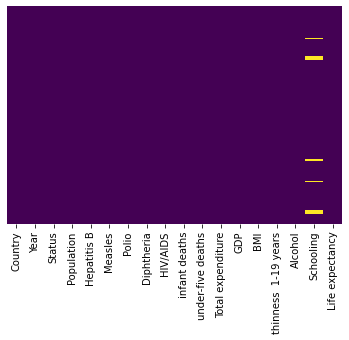

In [252]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As there are no more null values in Alcohol column, the column does not require further data cleaning.

### Schooling

#### First five rows of dataset having null value in Schooling column

In [253]:
df[df['Schooling'].isnull()].head(5)

Country  Year      Status    Population  Hepatitis B  Measles  \
416  Côte d'Ivoire  2015  Developing  1.283457e+07         83.0       65   
417  Côte d'Ivoire  2014  Developing  1.283457e+07         76.0       50   
418  Côte d'Ivoire  2013  Developing  1.283457e+07          8.0       48   
419  Côte d'Ivoire  2012  Developing  1.283457e+07         82.0      137   
420  Côte d'Ivoire  2011  Developing  1.283457e+07         62.0      628   

     Polio  Diphtheria  HIV/AIDS  infant deaths  under-five deaths  \
416   81.0        83.0       1.9             57                 79   
417   76.0        76.0       2.0             58                 80   
418   79.0         8.0       2.4             59                 81   
419   83.0        82.0       2.9             59                 82   
420   58.0        62.0       3.3             60                 83   

     Total expenditure          GDP   BMI  thinness  1-19 years   Alcohol  \
416           5.935577  7664.398813  28.0                   5.5  4.638932   
417           5.720000  7664.398813  27.4                   5.6  0.010000   
418           5.810000  7664.398813  26.8                   5.8  3.150000   
419           6.140000  7664.398813  26.2                   5.9  3.240000   
420           6.420000  7664.398813  25.6                   6.1  3.130000   

     Schooling  Life expectancy  
416        NaN             53.3  
417        NaN             52.8  
418        NaN             52.3  
419        NaN             52.0  
420        NaN             51.7

#### Handling the null values

In [254]:
df['Schooling'].fillna(df['Schooling'].mean(),inplace=True)

We are filling it with the mean of the column since it contains numerical data.

#### Heatmap showing the null values in the columns

<AxesSubplot:>

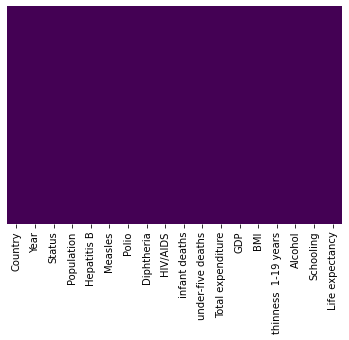

In [255]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As there are no more null values in Schooling column, the column does not require further data cleaning.

## Other Column adjustments

### Country

#### Initialising the Encoder

In [256]:
le=LabelEncoder()

#### Creating the labels

In [257]:
le.fit(df['Country'])

LabelEncoder()

#### Creating a new column for labels in dataset

In [258]:
df['Country_labeled']=le.transform(df['Country'])

#### Showing the new column

In [259]:
df.head(5)

Country  Year      Status  Population  Hepatitis B  Measles  Polio  \
0  Afghanistan  2015  Developing  33736494.0         65.0     1154    6.0   
1  Afghanistan  2014  Developing    327582.0         62.0      492   58.0   
2  Afghanistan  2013  Developing  31731688.0         64.0      430   62.0   
3  Afghanistan  2012  Developing   3696958.0         67.0     2787   67.0   
4  Afghanistan  2011  Developing   2978599.0         68.0     3013   68.0   

   Diphtheria  HIV/AIDS  infant deaths  under-five deaths  Total expenditure  \
0        65.0       0.1             62                 83               8.16   
1        62.0       0.1             64                 86               8.18   
2        64.0       0.1             66                 89               8.13   
3        67.0       0.1             69                 93               8.52   
4        68.0       0.1             71                 97               7.87   

          GDP   BMI  thinness  1-19 years  Alcohol  Schooling  \
0  584.259210  19.1                  17.2     0.01       10.1   
1  612.696514  18.6                  17.5     0.01       10.0   
2  631.744976  18.1                  17.7     0.01        9.9   
3  669.959000  17.6                  17.9     0.01        9.8   
4   63.537231  17.2                  18.2     0.01        9.5   

   Life expectancy  Country_labeled  
0             65.0                0  
1             59.9                0  
2             59.9                0  
3             59.5                0  
4             59.2                0

As we can see a new column named Country_labeled is added in the last

### Infant deaths

#### Dropping the column

In [260]:
df=df.drop('infant deaths',axis=1)

Since under 5 deaths already covers the infant deaths, it is better to use that feature only.

### Status

#### Defining function to convert string to desired integer

In [261]:
def func(elem):
    if elem=='Developing':
        return 0
    else:
        return 1

#### Converting the column using the function

In [262]:
df['Status']=df['Status'].apply(lambda x: func(x))

#### Showing first five rows with value 1 in the column

In [263]:
df[df['Status']==1].head(5)

Country  Year  Status  Population  Hepatitis B  Measles  Polio  \
112  Australia  2015       1  23789338.0         93.0       74   93.0   
113  Australia  2014       1   2346694.0         91.0      340   92.0   
114  Australia  2013       1  23117353.0         91.0      158   91.0   
115  Australia  2012       1  22728254.0         91.0      199   92.0   
116  Australia  2011       1    223424.0         92.0      190   92.0   

     Diphtheria  HIV/AIDS  under-five deaths  Total expenditure          GDP  \
112        93.0       0.1                  1           5.935577  56554.38760   
113        92.0       0.1                  1           9.420000  62214.69120   
114        91.0       0.1                  1           9.360000  67792.33860   
115        92.0       0.1                  1           9.360000  67677.63477   
116        92.0       0.1                  1           9.200000  62245.12900   

      BMI  thinness  1-19 years    Alcohol  Schooling  Life expectancy  \
112  66.6                   0.6   4.638932       20.4             82.8   
113  66.1                   0.6   9.710000       20.4             82.7   
114  65.5                   0.6   9.870000       20.3             82.5   
115  65.0                   0.6  10.030000       20.1             82.3   
116  64.4                   0.6  10.300000       19.8             82.0   

     Country_labeled  
112                7  
113                7  
114                7  
115                7  
116                7

#### Showing first five rows with value 0 in the column

In [264]:
df[df['Status']==0].head(5)

Country  Year  Status  Population  Hepatitis B  Measles  Polio  \
0  Afghanistan  2015       0  33736494.0         65.0     1154    6.0   
1  Afghanistan  2014       0    327582.0         62.0      492   58.0   
2  Afghanistan  2013       0  31731688.0         64.0      430   62.0   
3  Afghanistan  2012       0   3696958.0         67.0     2787   67.0   
4  Afghanistan  2011       0   2978599.0         68.0     3013   68.0   

   Diphtheria  HIV/AIDS  under-five deaths  Total expenditure         GDP  \
0        65.0       0.1                 83               8.16  584.259210   
1        62.0       0.1                 86               8.18  612.696514   
2        64.0       0.1                 89               8.13  631.744976   
3        67.0       0.1                 93               8.52  669.959000   
4        68.0       0.1                 97               7.87   63.537231   

    BMI  thinness  1-19 years  Alcohol  Schooling  Life expectancy  \
0  19.1                  17.2     0.01       10.1             65.0   
1  18.6                  17.5     0.01       10.0             59.9   
2  18.1                  17.7     0.01        9.9             59.9   
3  17.6                  17.9     0.01        9.8             59.5   
4  17.2                  18.2     0.01        9.5             59.2   

   Country_labeled  
0                0  
1                0  
2                0  
3                0  
4                0

## Information about the columns of the dataset

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   int64  
 3   Population            2848 non-null   float64
 4   Hepatitis B           2848 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2848 non-null   float64
 7   Diphtheria            2848 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   under-five deaths     2848 non-null   int64  
 10  Total expenditure     2848 non-null   float64
 11  GDP                   2848 non-null   float64
 12  BMI                   2848 non-null   float64
 13  thinness  1-19 years  2848 non-null   float64
 14  Alcohol               2848 non-null   float64
 15  Schooling            

## Description of the columns of the dataset

In [266]:
df.describe()

Year       Status    Population  Hepatitis B        Measles  \
count  2848.000000  2848.000000  2.848000e+03  2848.000000    2848.000000   
mean   2007.500000     0.174157  1.283457e+07    81.076756    2083.082163   
std       4.610582     0.379311  5.450439e+07    22.511937   10249.107207   
min    2000.000000     0.000000  3.400000e+01     1.000000       0.000000   
25%    2003.750000     0.000000  4.283075e+05    81.076756       0.000000   
50%    2007.500000     0.000000  3.742413e+06    87.000000      16.000000   
75%    2011.250000     0.000000  1.283457e+07    96.000000     336.750000   
max    2015.000000     1.000000  1.293859e+09    99.000000  212183.000000   

             Polio   Diphtheria     HIV/AIDS  under-five deaths  \
count  2848.000000  2848.000000  2848.000000        2848.000000   
mean     82.682220    82.451396     1.756461          39.500000   
std      23.356624    23.614741     5.148935         159.800866   
min       3.000000     2.000000     0.100000           0.000000   
25%      78.000000    79.000000     0.100000           0.000000   
50%      93.000000    93.000000     0.100000           4.000000   
75%      97.000000    97.000000     0.700000          25.000000   
max      99.000000    99.000000    50.600000        2500.000000   

       Total expenditure            GDP          BMI  thinness  1-19 years  \
count        2848.000000    2848.000000  2848.000000           2848.000000   
mean            5.935577    7664.398813    38.503374              4.847230   
std             2.405271   13295.954693    19.843020              4.418652   
min             0.370000       1.681350     1.000000              0.100000   
25%             4.340000     615.809250    19.600000              1.600000   
50%             5.935577    3217.098778    43.500000              3.400000   
75%             7.370000    7664.398813    56.100000              7.100000   
max            17.600000  119172.741800    77.600000             27.700000   

           Alcohol    Schooling  Life expectancy  Country_labeled  
count  2848.000000  2848.000000      2848.000000      2848.000000  
mean      4.638932    12.060156        69.347402        88.500000  
std       3.928223     3.225515         9.528332        51.392386  
min       0.010000     0.000000        36.300000         0.000000  
25%       1.137500    10.400000        63.500000        44.000000  
50%       4.175000    12.200000        72.200000        88.500000  
75%       7.467500    14.125000        75.800000       133.000000  
max      17.870000    20.700000        89.000000       177.000000

## Exploratory data analysis

### Initialising the Scaler

In [267]:
sc = StandardScaler()

### Fitting the numerical columns in Scaler creating a 2d array 

In [268]:
dsc=sc.fit_transform(df.drop('Country',axis=1))

### Creating a Dataframe for the 2d array and showing first 5 rows of it 

In [269]:
cols=['Year', 'Status', 'Population', 'Hepatitis B', 'Measles',
       'Polio', 'Diphtheria', 'HIV/AIDS', 'under-five deaths',
       'Total expenditure', 'GDP', 'BMI', 'thinness  1-19 years', 'Alcohol',
       'Schooling', 'Life expectancy','Country_labeled']
dsc=pd.DataFrame(dsc,columns=cols)
dsc.head(5)

Year    Status  Population  Hepatitis B   Measles     Polio  \
0  1.626978 -0.459221    0.383558    -0.714269 -0.090666 -3.283680   
1  1.410048 -0.459221   -0.229508    -0.847555 -0.155268 -1.056940   
2  1.193118 -0.459221    0.346769    -0.758698 -0.161319 -0.885652   
3  0.976187 -0.459221   -0.167679    -0.625412  0.068693 -0.671543   
4  0.759257 -0.459221   -0.180861    -0.580983  0.090748 -0.628721   

   Diphtheria  HIV/AIDS  under-five deaths  Total expenditure       GDP  \
0   -0.739134 -0.321766           0.272262           0.924974 -0.532597   
1   -0.866196 -0.321766           0.291038           0.933291 -0.530458   
2   -0.781488 -0.321766           0.309815           0.912500 -0.529025   
3   -0.654426 -0.321766           0.334850           1.074672 -0.526150   
4   -0.612073 -0.321766           0.359886           0.804385 -0.571768   

        BMI  thinness  1-19 years   Alcohol  Schooling  Life expectancy  \
0 -0.978016              2.796088 -1.178585  -0.607810        -0.456341   
1 -1.003218              2.863994 -1.178585  -0.638818        -0.991680   
2 -1.028420              2.909265 -1.178585  -0.669826        -0.991680   
3 -1.053622              2.954535 -1.178585  -0.700835        -1.033668   
4 -1.073784              3.022441 -1.178585  -0.793859        -1.065158   

   Country_labeled  
0        -1.722347  
1        -1.722347  
2        -1.722347  
3        -1.722347  
4        -1.722347

### Correlation between columns of the dataset

In [270]:
dcorr=dsc.corr()
dcorr

Year        Status  Population  Hepatitis B  \
Year                  1.000000e+00  6.081278e-18    0.014941     0.086101   
Status                6.081278e-18  1.000000e+00   -0.039269     0.091944   
Population            1.494095e-02 -3.926859e-02    1.000000    -0.111072   
Hepatitis B           8.610088e-02  9.194366e-02   -0.111072     1.000000   
Measles              -8.316023e-02 -7.027200e-02    0.276094    -0.097171   
Polio                 9.429706e-02  2.165350e-01   -0.029801     0.405061   
Diphtheria            1.282273e-01  2.134815e-01   -0.021611     0.501157   
HIV/AIDS             -1.371929e-01 -1.477618e-01   -0.028679    -0.104605   
under-five deaths    -3.647839e-02 -1.081597e-01    0.545203    -0.183739   
Total expenditure     7.845277e-02  2.968014e-01   -0.065690     0.059638   
GDP                   9.408126e-02  4.486375e-01   -0.025420     0.060731   
BMI                   1.060478e-01  3.082362e-01   -0.061766     0.139434   
thinness  1-19 years -3.909783e-02 -3.702091e-01    0.236788    -0.111690   
Alcohol              -4.471385e-02  5.769617e-01   -0.028398     0.066520   
Schooling             2.029575e-01  4.881243e-01   -0.026595     0.158324   
Life expectancy       1.691442e-01  4.833298e-01   -0.017603     0.204348   
Country_labeled      -3.430464e-18  2.695564e-02   -0.013738    -0.013638   

                       Measles     Polio  Diphtheria  HIV/AIDS  \
Year                 -0.083160  0.094297    0.128227 -0.137193   
Status               -0.070272  0.216535    0.213482 -0.147762   
Population            0.276094 -0.029801   -0.021611 -0.028679   
Hepatitis B          -0.097171  0.405061    0.501157 -0.104605   
Measles               1.000000 -0.169092   -0.174605  0.045853   
Polio                -0.169092  1.000000    0.672972 -0.159411   
Diphtheria           -0.174605  0.672972    1.000000 -0.162605   
HIV/AIDS              0.045853 -0.159411   -0.162605  1.000000   
under-five deaths     0.512826 -0.188233   -0.191159  0.039157   
Total expenditure    -0.102828  0.135440    0.149035 -0.000318   
GDP                  -0.062485  0.192384    0.181221 -0.135291   
BMI                  -0.174733  0.285454    0.282239 -0.244326   
thinness  1-19 years  0.258073 -0.224705   -0.223666  0.200424   
Alcohol              -0.050377  0.205739    0.208102 -0.048878   
Schooling            -0.129975  0.377328    0.378301 -0.218795   
Life expectancy      -0.198178  0.461290    0.473636 -0.559105   
Country_labeled       0.011017  0.021049   -0.005377  0.094499   

                      under-five deaths  Total expenditure       GDP  \
Year                          -0.036478           0.078453  0.094081   
Status                        -0.108160           0.296801  0.448637   
Population                     0.545203          -0.065690 -0.025420   
Hepatitis B                   -0.183739           0.059638  0.060731   
Measles                        0.512826          -0.102828 -0.062485   
Polio                         -0.188233           0.135440  0.192384   
Diphtheria                    -0.191159           0.149035  0.181221   
HIV/AIDS                       0.039157          -0.000318 -0.135291   
under-five deaths              1.000000          -0.122666 -0.104517   
Total expenditure             -0.122666           1.000000  0.123522   
GDP                           -0.104517           0.123522  1.000000   
BMI                           -0.224889           0.230964  0.275412   
thinness  1-19 years           0.470517          -0.270532 -0.269273   
Alcohol                       -0.104747           0.302061  0.317181   
Schooling                     -0.197999           0.235277  0.428341   
Life expectancy               -0.224903           0.214010  0.428644   
Country_labeled               -0.007684           0.051178 -0.021682   

                           BMI  thinness  1-19 years   Alcohol  Schooling  \
Year                  0.106048             -0.039098 -0.044714   0.202957   
Sta

### Heat map for Correlation between the columns

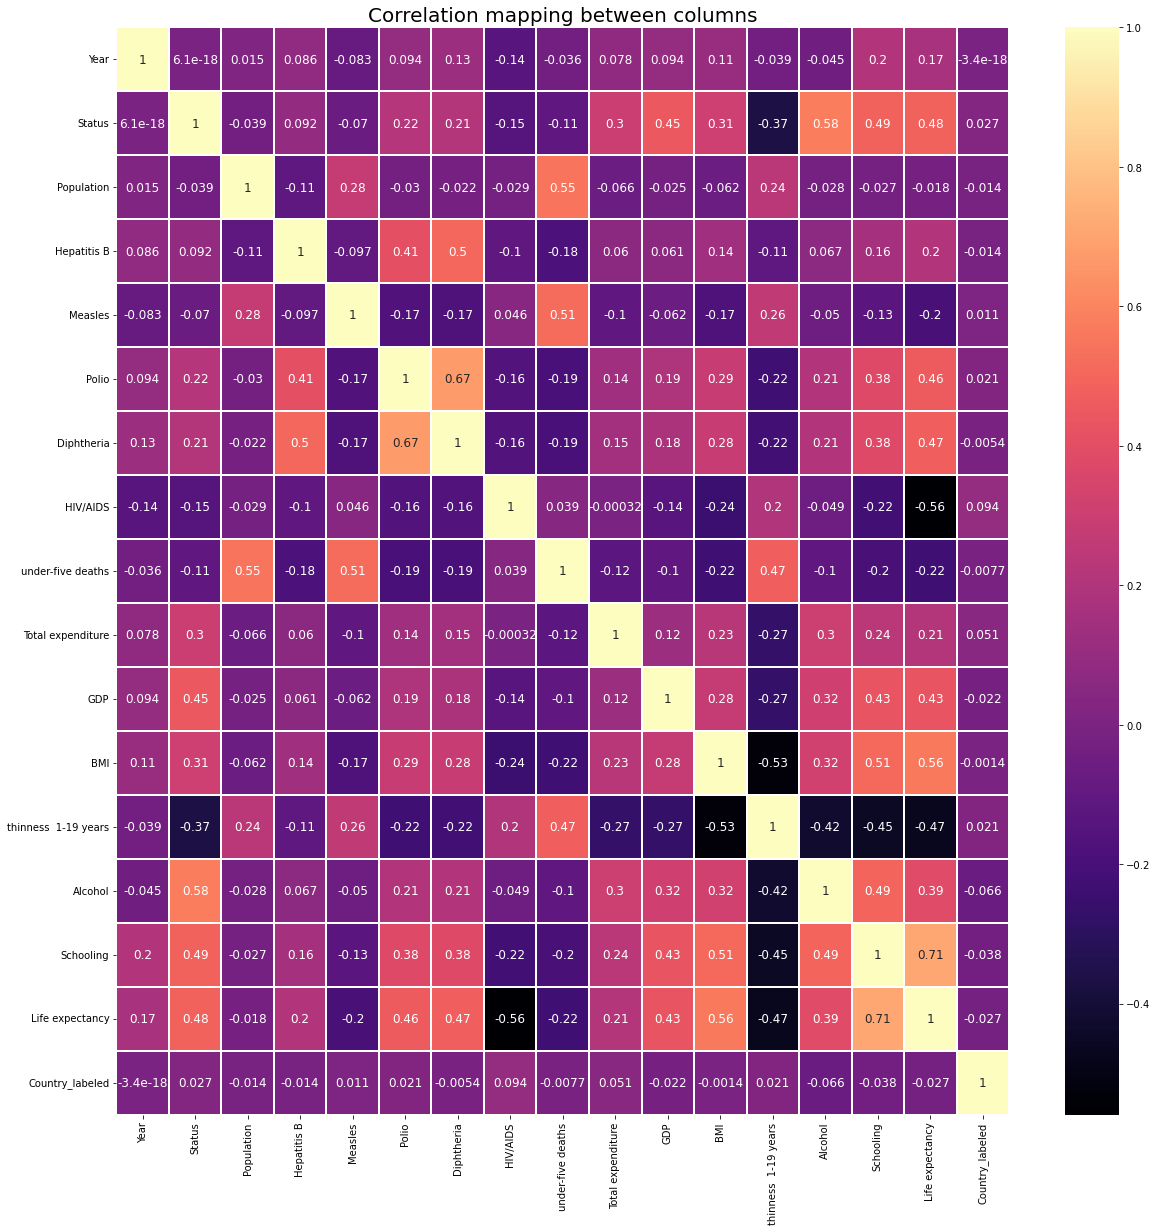

In [271]:
plt.figure(figsize=(20,20))
sns.heatmap(dcorr,annot=True,cmap='magma',linewidths=0.3,annot_kws={'fontsize':12})
plt.title('Correlation mapping between columns',fontsize=20)
plt.show()

### Clustermap for Correlation between the columns

Text(0.5, 0.98, 'Clustering with Correlation mapping')

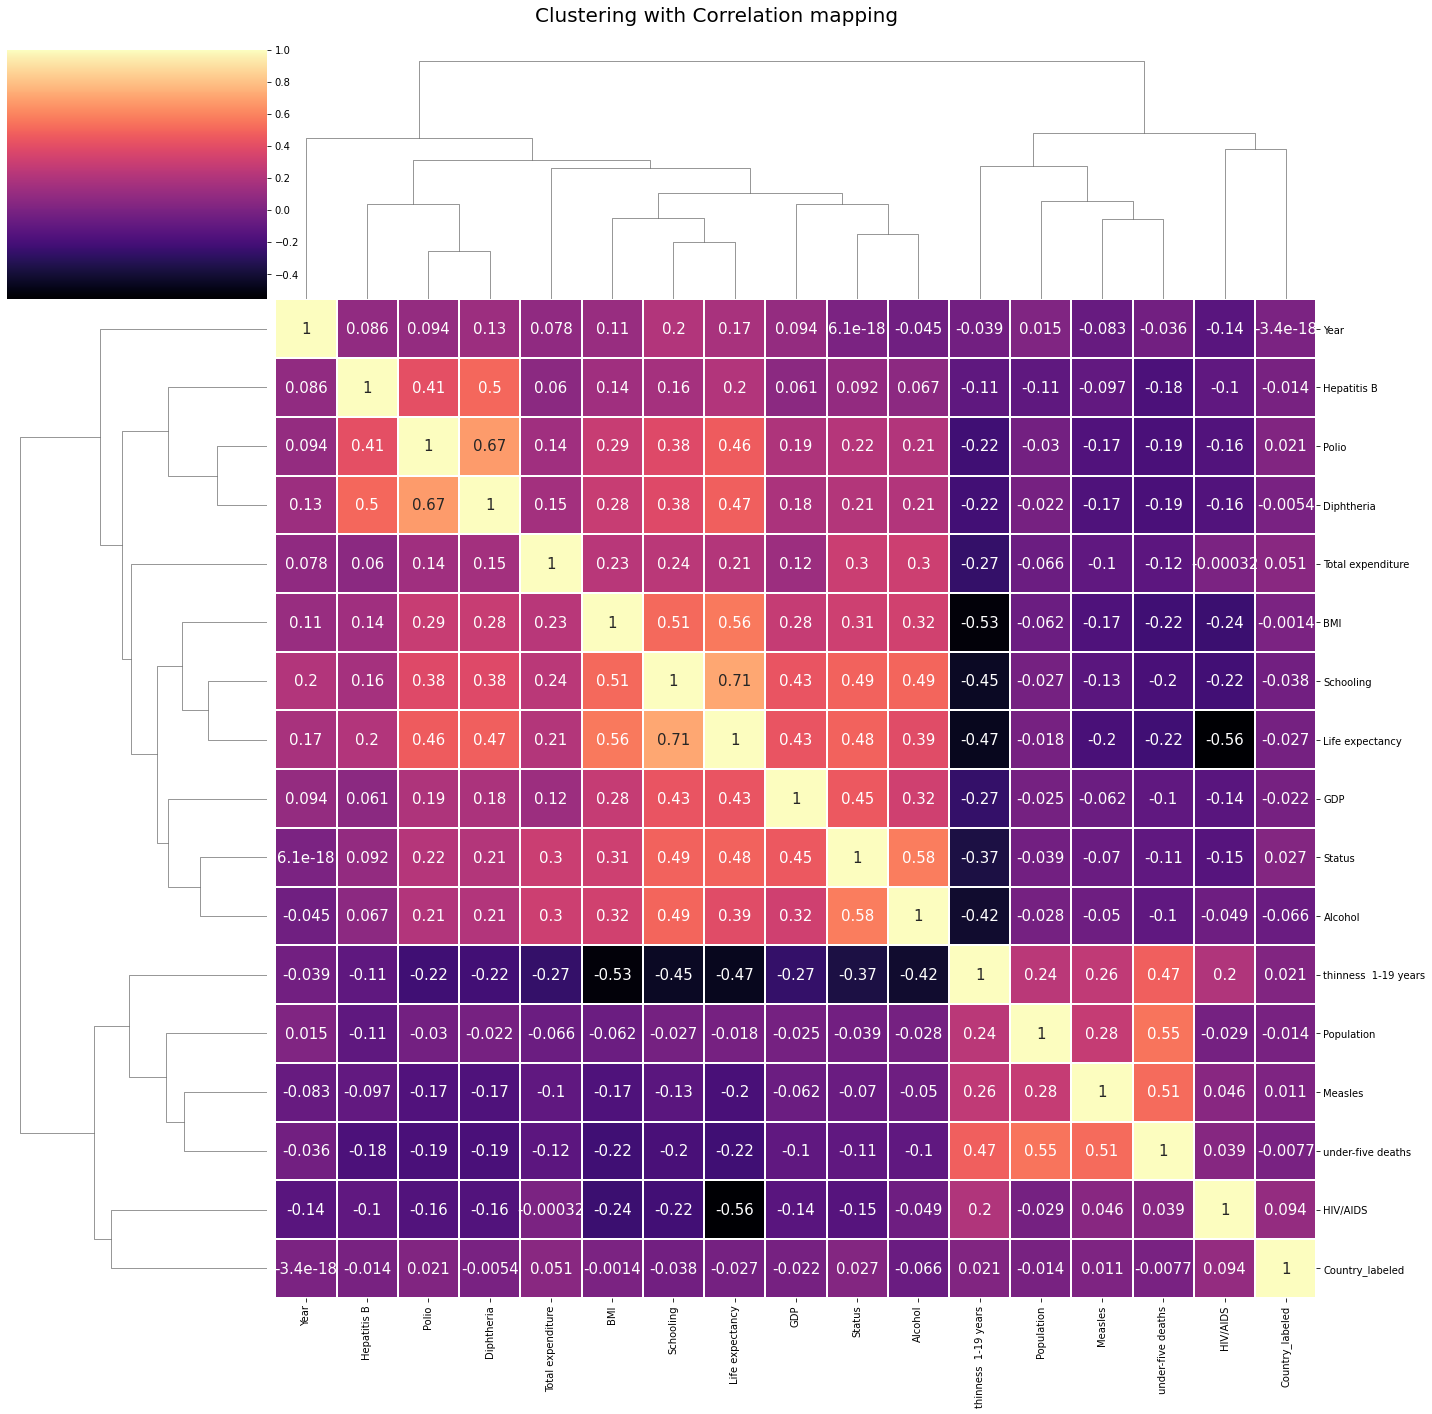

In [272]:
plot = sns.clustermap(dcorr,annot=True,cmap='magma',linewidths=0.3,figsize=(20,20),annot_kws={'fontsize':15})
plot.fig.subplots_adjust(top=.95)
plot.fig.suptitle('Clustering with Correlation mapping',size=20)

Analysis: From the cluster map we can see Country_labeled is highly correlated with HIV/AIDs, Measles is highly correlated with under five deaths, Alcohol is correlated with Status, Schooling is highly correlated with Life expectancy and Diphtheria is highly correlated with Polio.

### Country Correlation with other features - Bar Plot

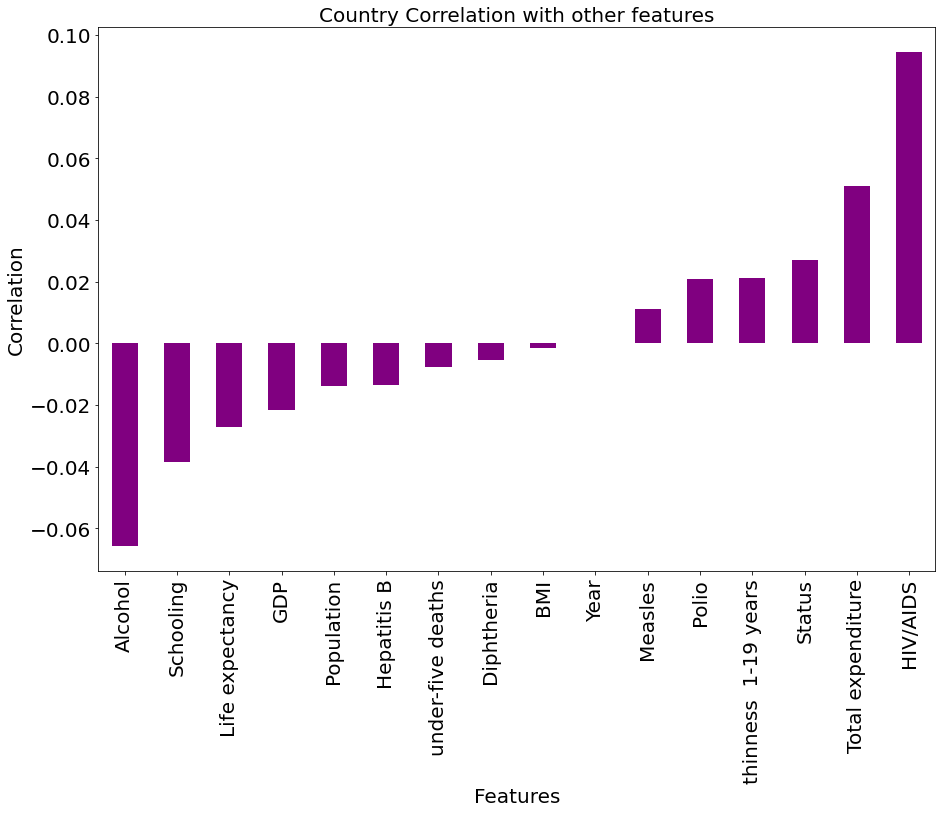

In [273]:
plt.figure(figsize=(15,10))
dcorr['Country_labeled'][:-1].sort_values().plot(kind='bar',color='purple')
plt.title('Country Correlation with other features',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Features',fontdict={'size':20})
plt.ylabel('Correlation',fontdict={'size':20})
plt.show()

Analysis: As mentioned earlier, Country is highly correlated with HIV/AIDS. After that Country is correlated with Total expenditure and Status. Here we can see there is almost 0 correlation between Country and Year.

### Year based plots

#### Making year grouped Dataframe

In [274]:
d_year=df.groupby('Year').mean()
d_year

Status    Population  Hepatitis B      Measles      Polio  Diphtheria  \
Year                                                                            
2000  0.174157  1.005478e+07    78.193082  4242.825843  76.511498   74.434574   
2001  0.174157  1.051882e+07    77.407871  4234.921348  78.185655   76.940192   
2002  0.174157  8.092535e+06    78.928199  2843.601124  79.889688   79.117431   
2003  0.174157  1.058643e+07    75.959763  3384.915730  80.518901   79.038780   
2004  0.174157  1.629304e+07    79.007738  2479.758427  80.339126   80.212937   
2005  0.174157  1.747027e+07    80.891497  2583.713483  81.103171   81.791589   
2006  0.174157  1.512488e+07    81.636963  1549.016854  84.621810   82.305907   
2007  0.174157  1.768548e+07    81.617091   980.438202  84.846529   84.642985   
2008  0.174157  9.935077e+06    83.508624   806.870787  85.588102   84.980064   
2009  0.174157  9.684164e+06    84.052274  1262.331461  85.279114   85.086806   
2010  0.174157  1.235833e+07    80.759277  1690.544944  83.846529   82.732873   
2011  0.174157  1.191125e+07    83.853920  1943.842697  84.780899   87.151685   
2012  0.174157  1.241679e+07    82.926954  1219.887640  84.196629   85.910112   
2013  0.174157  1.237397e+07    83.313732  1397.168539  85.398876   86.331461   
2014  0.174157  1.915122e+07    82.920042  1502.297753  84.719101   83.994382   
2015  0.174157  1.169611e+07    82.251072  1207.179775  83.089888   84.550562   

      HIV/AIDS  under-five deaths  Total expenditure           GDP        BMI  \
Year                                                                            
2000  2.536517          49.241573           5.615856   5293.117865  34.760712   
2001  2.580337          47.859551           5.614844   5408.110000  36.387117   
2002  2.582022          46.426966           5.692373   5176.790678  37.365206   
2003  2.556180          45.011236           5.837622   5322.803459  36.671386   
2004  2.488764          43.797753           5.851105   7304.755775  36.993858   
2005  2.357303          42.269663           5.910375   7462.576899  35.797229   
2006  2.180899          41.505618           5.676555   7538.734335  37.740487   
2007  2.005056          40.179775           5.671836   8614.558275  37.160712   
2008  1.809551          38.960674           5.730319  10335.106356  38.414083   
2009  1.550000          37.561798           6.542397   7251.491790  39.778690   
2010  1.282022          36.488764           6.144532   7627.397039  38.676442   
2011  1.100562          34.988764           5.964420   9608.847664  40.017454   
2012  0.932584          33.752809           6.256467  10109.260742  40.406218   
2013  0.785393          32.500000           6.297815   8461.828390  41.512397   
2014  0.688764          31.314607           6.214276   9778.320193  41.470263   
2015  0.667416          30.140449           5.948435   7336.681547  42.901723   

      thinness  1-19 years   Alcohol  Schooling  Life expectancy  \
Year                                                               
2000              5.113452  4.596061  10.682593        66.879213   
2001              4.923564  4.587803  11.100009        67.301124   
2002              5.138733  4.692073  11.276413        67.503371   
2003              4.896036  4.718477  11.430908        67.548876   
2004              4.911205  4.779769  11.653941        67.793820   
2005              5.079182  4.866673  11.767986        68.308989   
2006              5.098283  4.941679  11.991582        68.751124   
2007              5.017946  5.027466  12.093829        69.139326   
2008              4.890980  5.019938  12.216301        69.564045   
2009              4.770194  4.908477  12.336526        70.030337   
2010              4.643227  4.958084  12.462930        70.172472   
2011              4.630306  4.882859  12.610121        70.780337   
2012              4.623003  4.157185  12.726975        71.039888   
2013              4.669632  4.087354  12.823042        71.358427   
20

#### Year Vs Schooling - Bar Plot

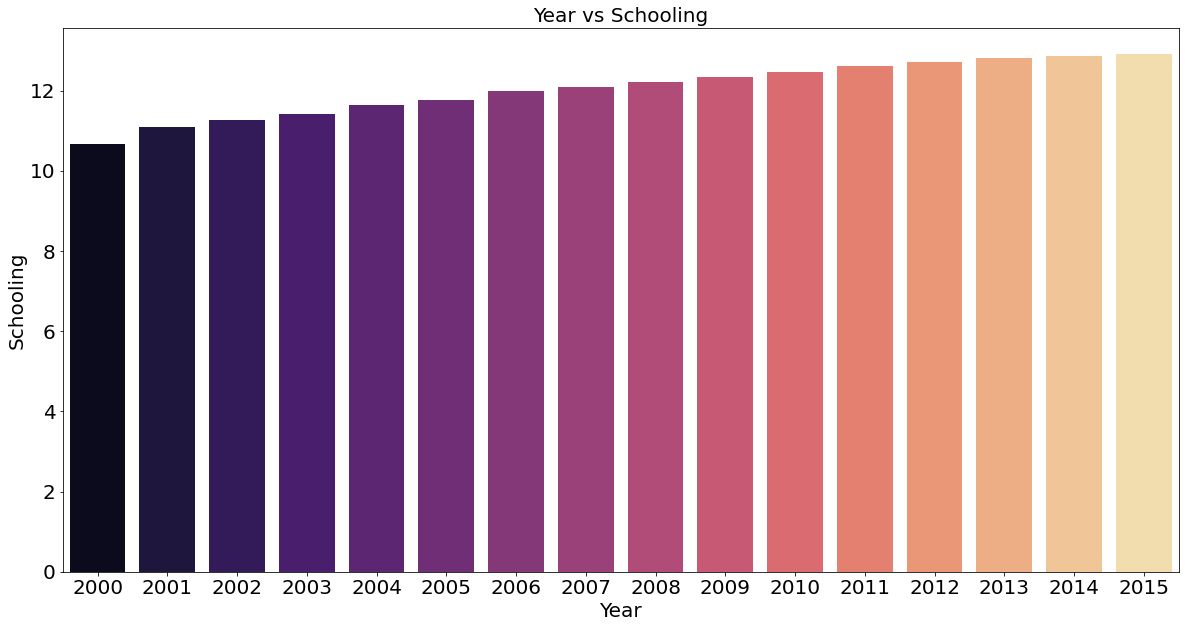

In [275]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='Schooling',data=d_year,palette="magma",ci=None)
plt.title('Year vs Schooling',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('Schooling',fontdict={'size':20})
plt.show()

Analysis: We can see that as the year passed by Schooling has increased.

#### Year Vs Population - Bar Plot

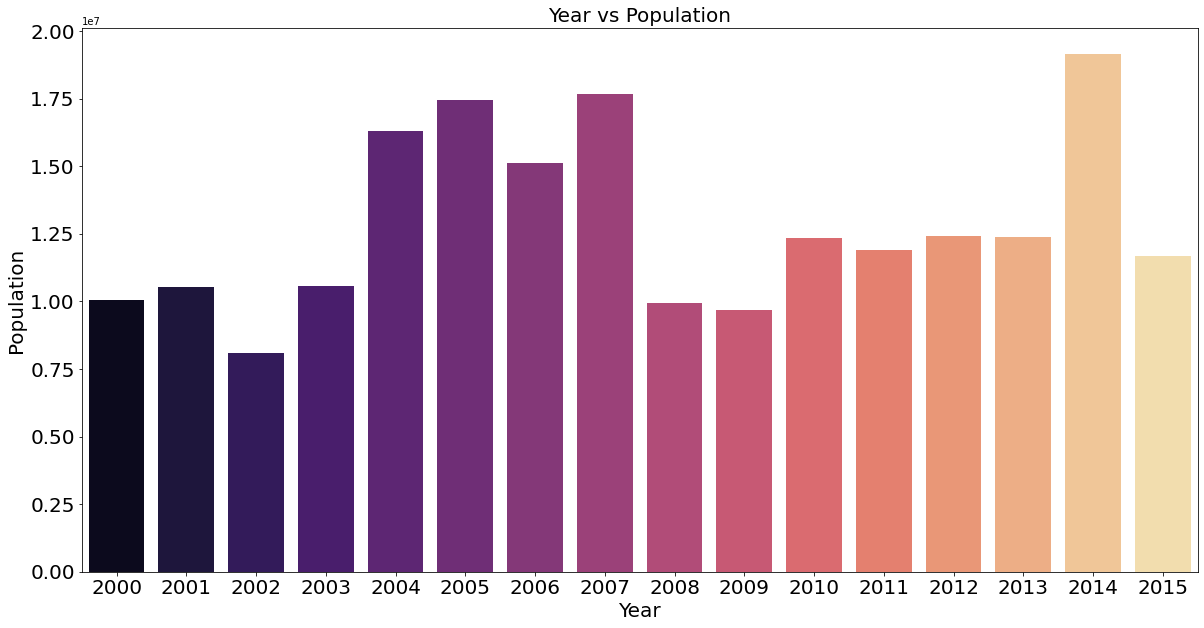

In [276]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='Population',data=d_year,palette="magma",ci=None)
plt.title('Year vs Population',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('Population',fontdict={'size':20})
plt.show()

Analysis: Here there is no specific trend but we can see that maximum population is on 2014 and minimum population is on 2002 based on the given data.

#### Year Vs Hepatitis B - Bar Plot

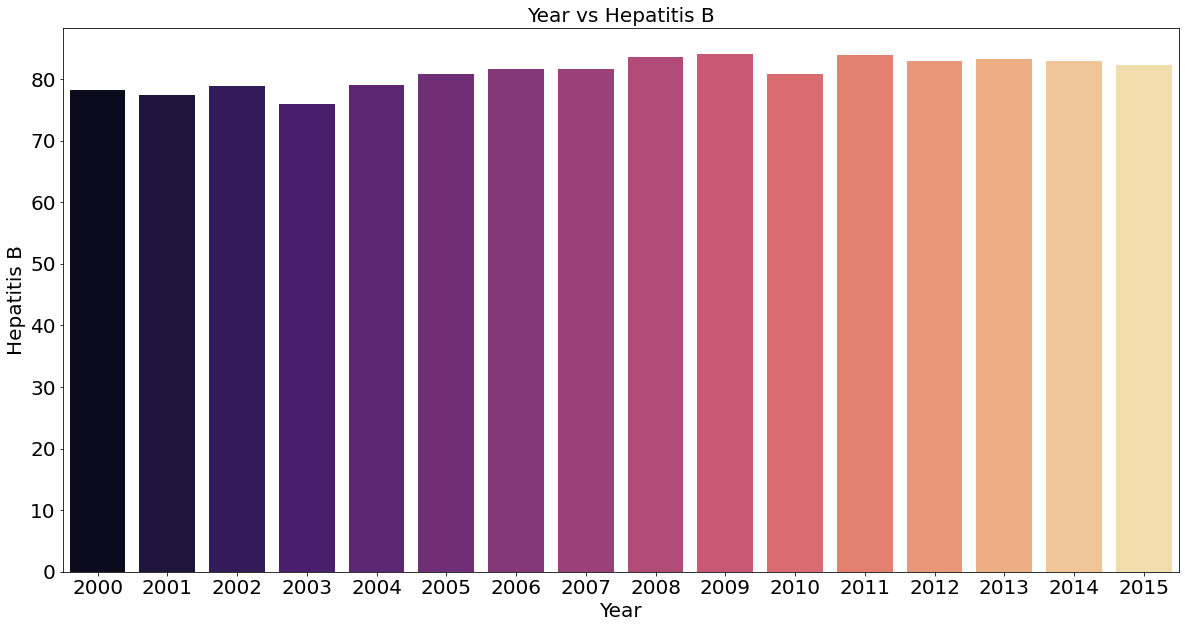

In [277]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='Hepatitis B',data=d_year,palette="magma",ci=None)
plt.title('Year vs Hepatitis B',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('Hepatitis B',fontdict={'size':20})
plt.show()

Analysis: Here we can see that trend in Hepatitis B in respect to Year has been similar. It has ranged between 75 and 85 only in all the years.

#### Year Vs Measles - Bar Plot

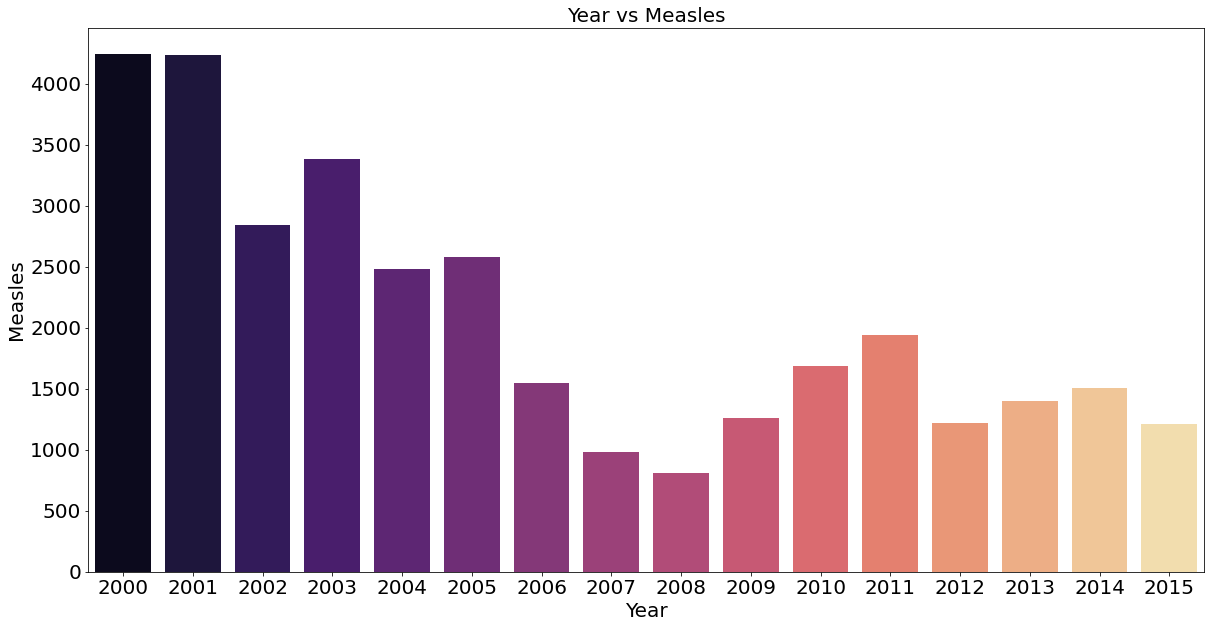

In [278]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='Measles',data=d_year,palette="magma",ci=None)
plt.title('Year vs Measles',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('Measles',fontdict={'size':20})
plt.show()

Analysis: Here we can see that earlier Measles was very high and then starting going down till 2008 and then starts slowly rising till 2011. After 2011 there has been an irregular trend. 

#### Year Vs Polio - Bar Plot

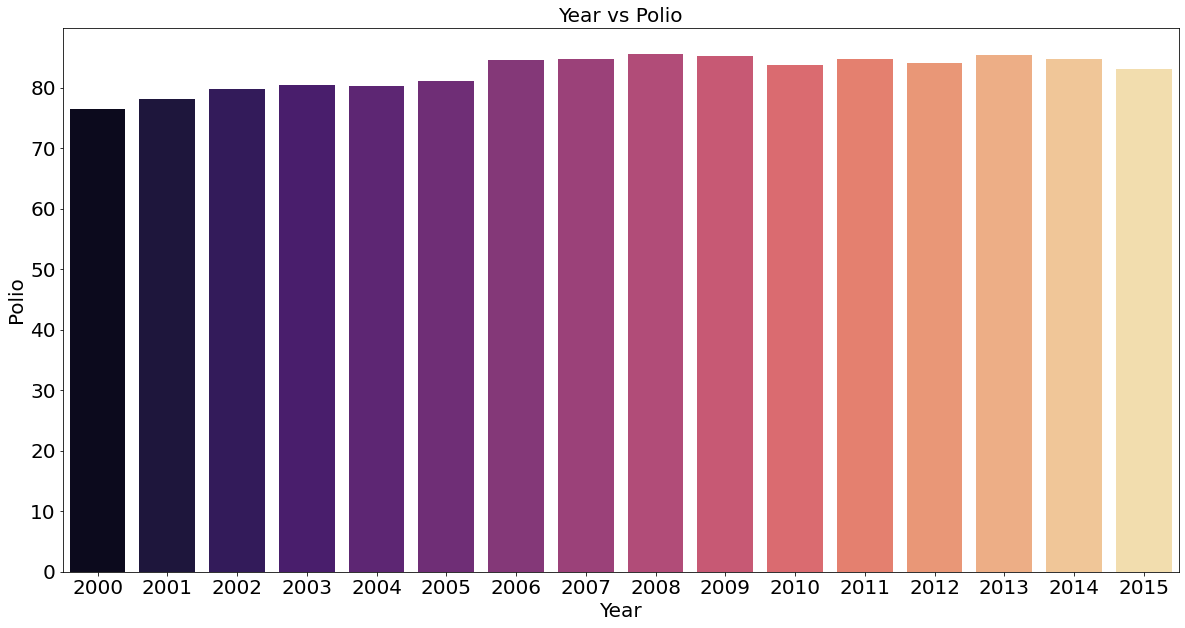

In [279]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='Polio',data=d_year,palette="magma",ci=None)
plt.title('Year vs Polio',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('Polio',fontdict={'size':20})
plt.show()

Analysis: Here we can see Polio has a very similar trend with respect to year. It ranges between 75 and 90.

#### Year Vs Diphtheria - Bar Plot

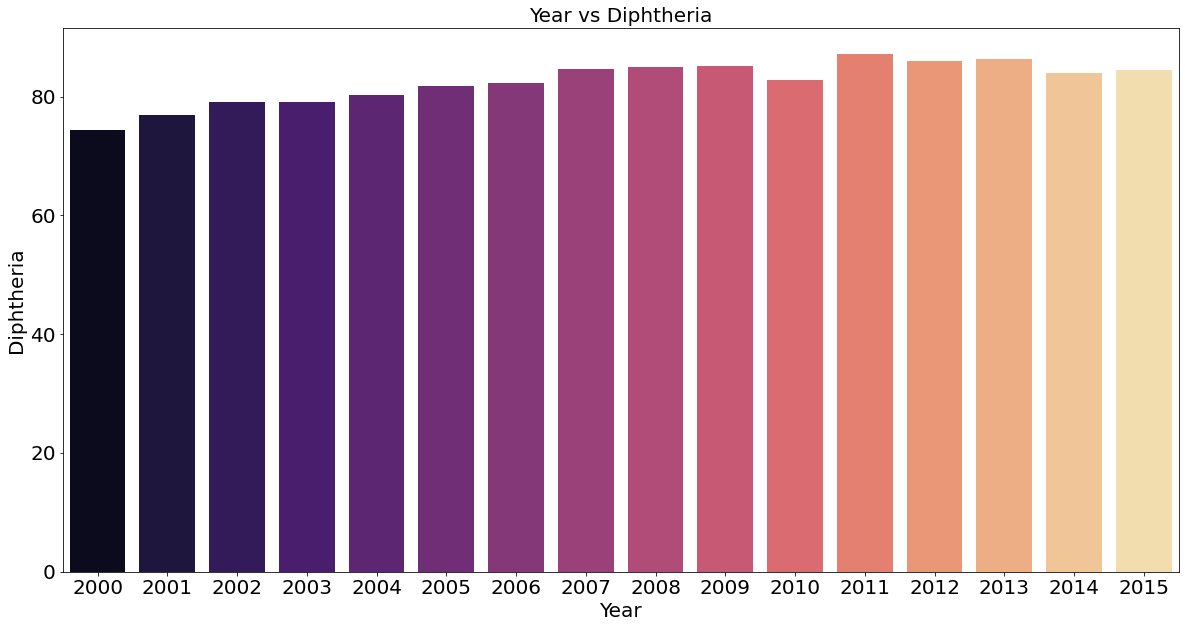

In [280]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='Diphtheria',data=d_year,palette="magma",ci=None)
plt.title('Year vs Diphtheria',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('Diphtheria',fontdict={'size':20})
plt.show()

Analysis: Here we can see Diphtheria has a very similar trend with respect to year. It ranges between 70 and 90.

#### Year Vs HIV/AIDS - Bar Plot

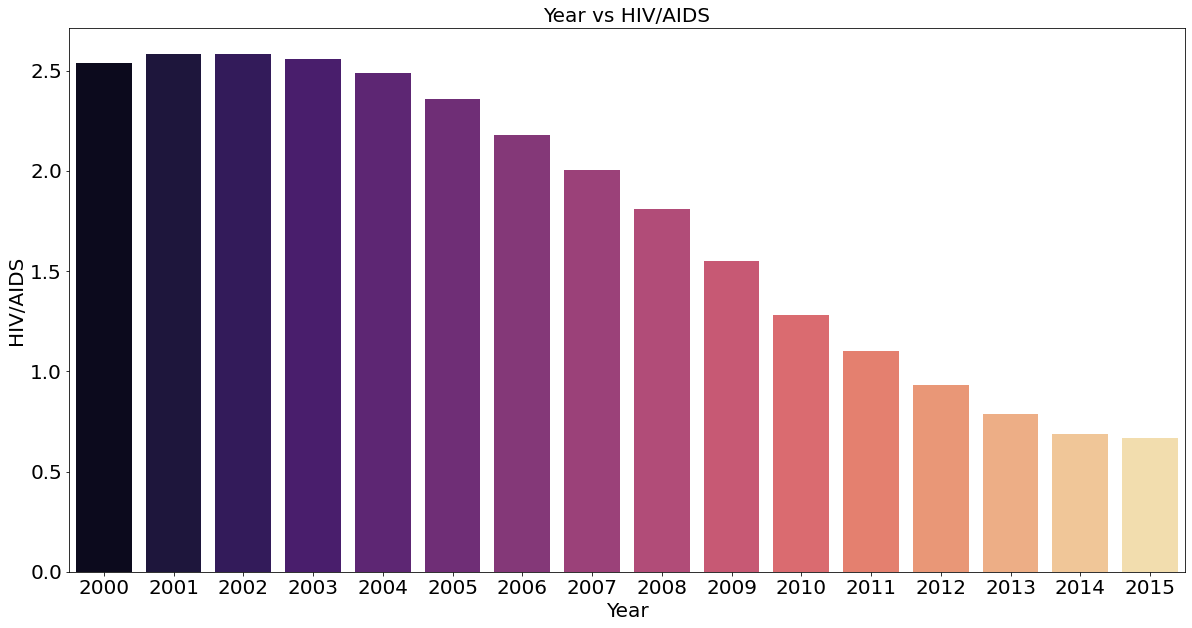

In [281]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='HIV/AIDS',data=d_year,palette="magma",ci=None)
plt.title('Year vs HIV/AIDS',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('HIV/AIDS',fontdict={'size':20})
plt.show()

Analysis: Here we can HIV/AIDS has gone down in subsequent years and was at it was maximum in 2001 and minimum in 2015.

#### Year Vs under-five deaths - Bar Plot

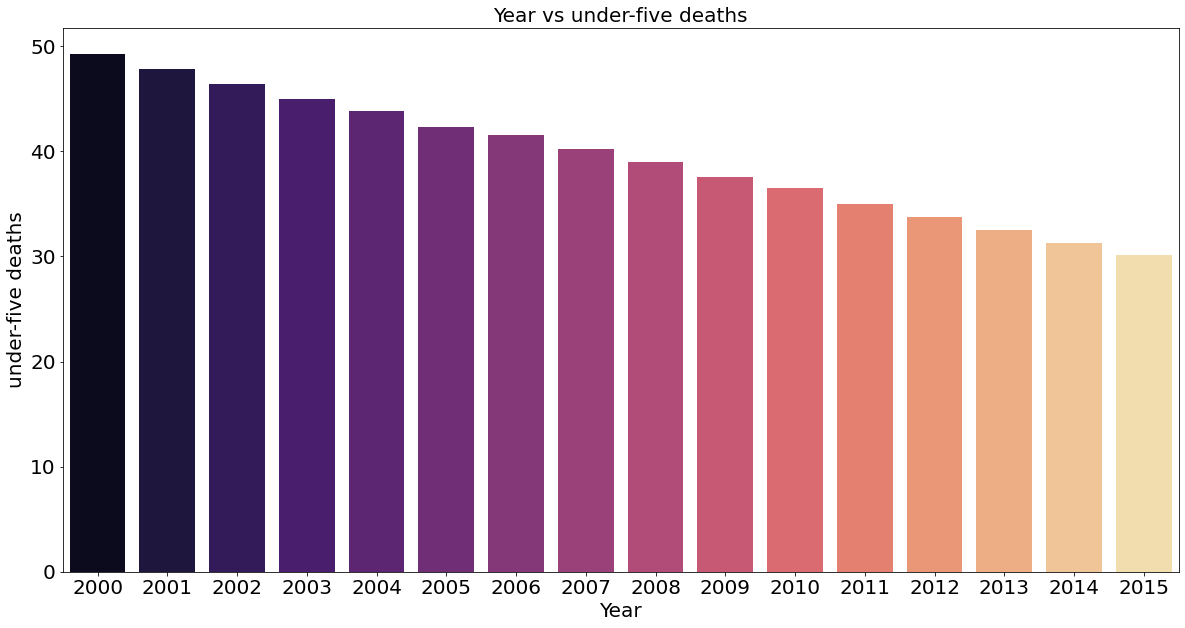

In [282]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='under-five deaths',data=d_year,palette="magma",ci=None)
plt.title('Year vs under-five deaths',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('under-five deaths',fontdict={'size':20})
plt.show()

Analysis: Here we can see that under-five deaths has been strictly decreasing from 2000 to 2015.

#### Year Vs Total Expenditure - Bar Plot

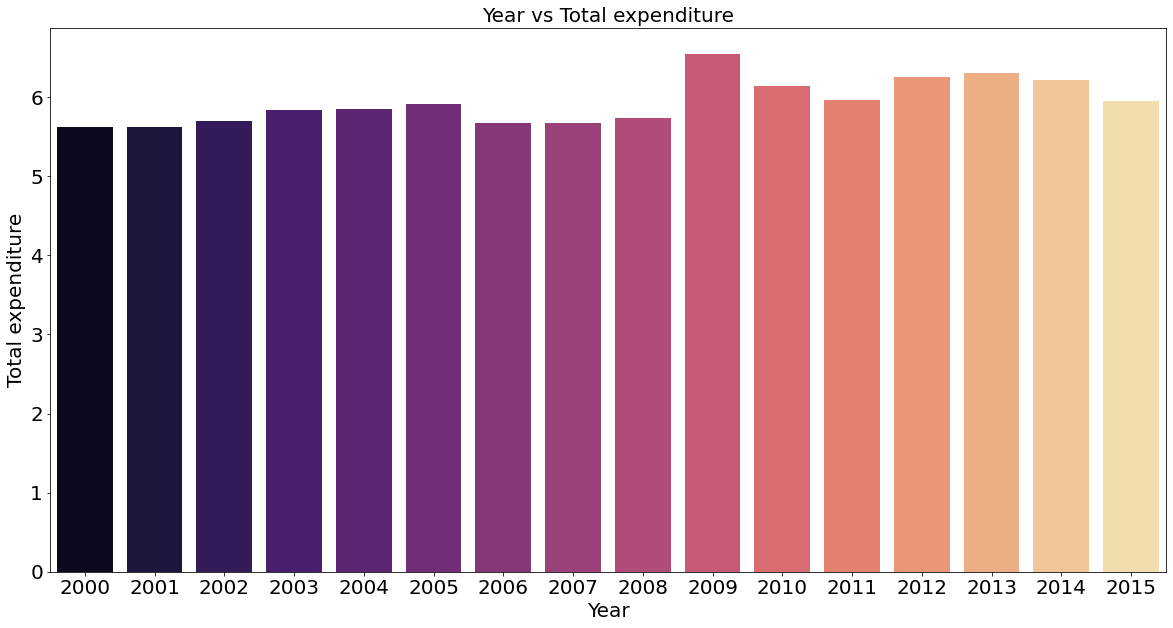

In [283]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='Total expenditure',data=d_year,palette="magma",ci=None)
plt.title('Year vs Total expenditure',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('Total expenditure',fontdict={'size':20})
plt.show()

Analysis: Here we can see Total expenditure follow similar trend between 2001 and 2008 and then it rises and follows similar trend again between 2010 and 2015.

#### Year Vs GDP - Bar Plot

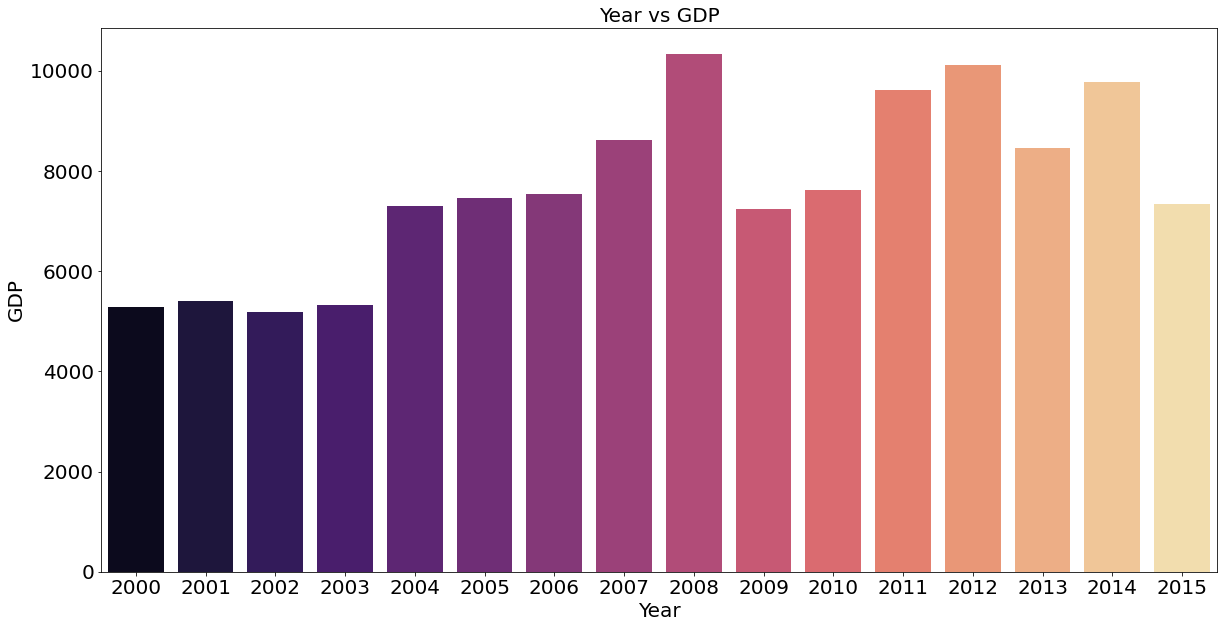

In [284]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='GDP',data=d_year,palette="magma",ci=None)
plt.title('Year vs GDP',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('GDP',fontdict={'size':20})
plt.show()

Analysis: Here we can see GDP has a very irregular pattern with respect to Year. It was maximum in 2008 and minimum in 2002.

#### Year Vs BMI - Bar Plot

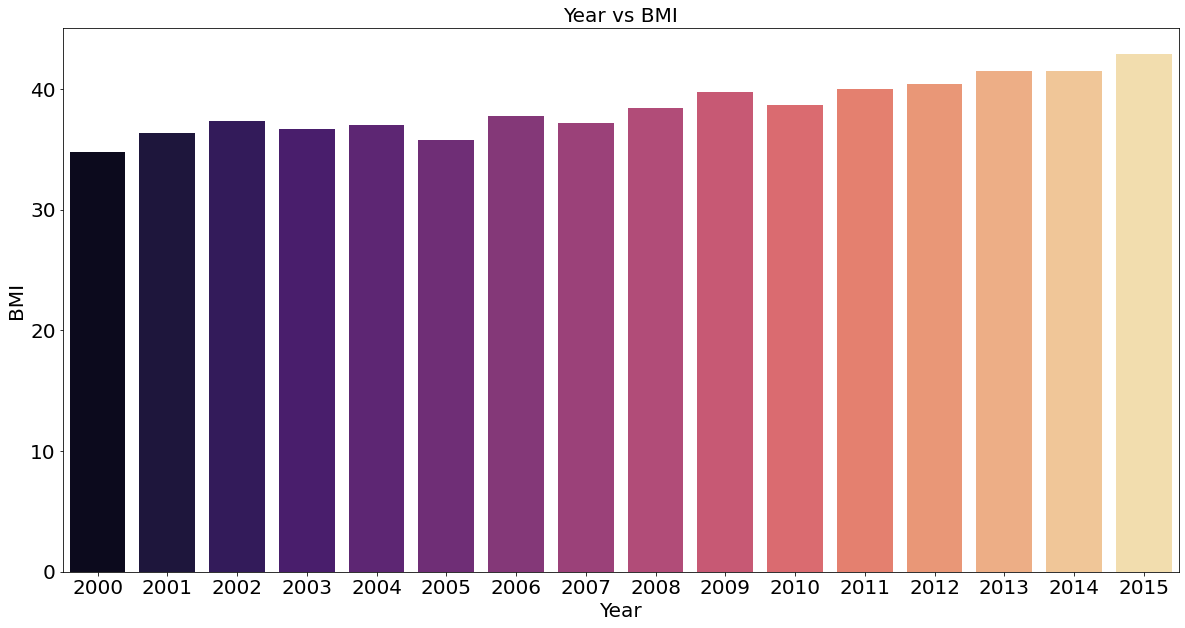

In [285]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='BMI',data=d_year,palette="magma",ci=None)
plt.title('Year vs BMI',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('BMI',fontdict={'size':20})
plt.show()

Analysis: Here we can see BMI has slightly increased with respect to Years. It ranged between 30 and 50.

#### Year Vs thinness 1-19 years - Bar Plot

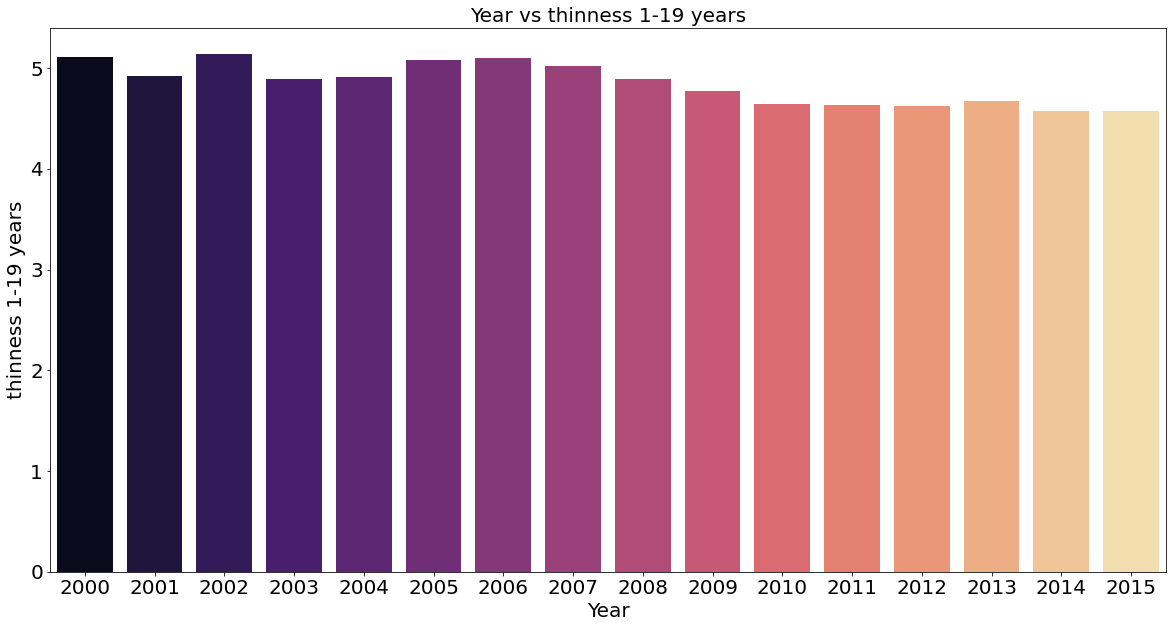

In [286]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='thinness  1-19 years',data=d_year,palette="magma",ci=None)
plt.title('Year vs thinness 1-19 years',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('thinness 1-19 years',fontdict={'size':20})
plt.show()

Analysis: Here we can see thinness has slightly decreased with respect to Years. It ranges between 4.5 and 6.

#### Year Vs Alcohol - Bar Plot

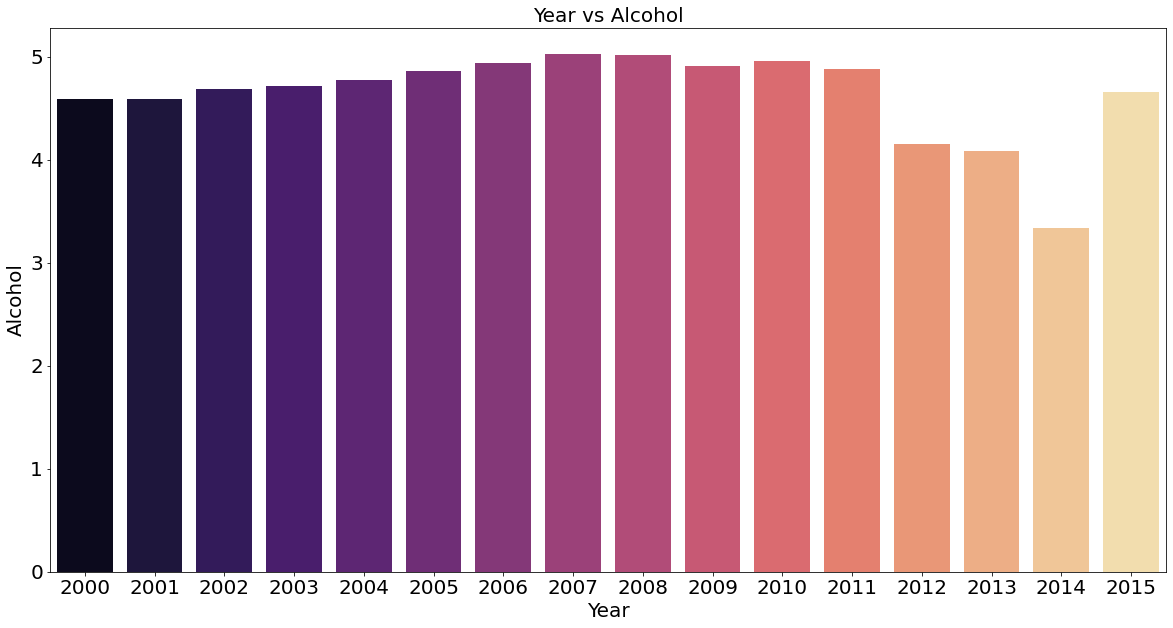

In [287]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='Alcohol',data=d_year,palette="magma",ci=None)
plt.title('Year vs Alcohol',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('Alcohol',fontdict={'size':20})
plt.show()

Analysis: Here we can Alcohol had a similar trend between Year 2000 and 2011 and then it started decreasing till 2014 and spiked up in 2015.

#### Year Vs Life expectancy - Bar Plot

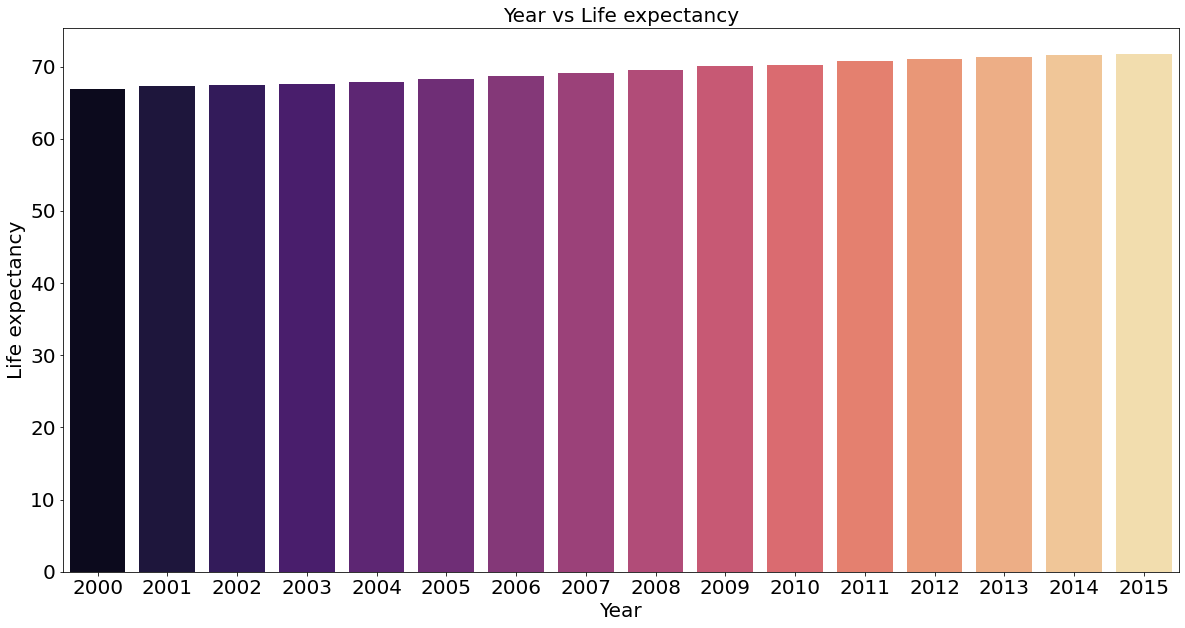

In [288]:
plt.figure(figsize=(20,10))
X=d_year.index
ax=sns.barplot(x=X,y='Life expectancy',data=d_year,palette="magma",ci=None)
plt.title('Year vs Life expectancy',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontdict={'size':20})
plt.ylabel('Life expectancy',fontdict={'size':20})
plt.show()

Analysis: Here we can see Life Expectancy has been strictly increasing with respect to Years.

### Country based plots

#### Taking the world plot dataframe for plotting and showing first 5 rows of it

In [289]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3500\4109974910.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

#### Merging our dataframe with the world plotting dataframe

In [290]:
merged_data = world.merge(df, left_on='name', right_on='Country')
merged_data.head(5)

pop_est continent  name iso_a3  gdp_md_est  \
0  889953.0   Oceania  Fiji    FJI        5496   
1  889953.0   Oceania  Fiji    FJI        5496   
2  889953.0   Oceania  Fiji    FJI        5496   
3  889953.0   Oceania  Fiji    FJI        5496   
4  889953.0   Oceania  Fiji    FJI        5496   

                                            geometry Country  Year  Status  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...    Fiji  2015       0   
1  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...    Fiji  2014       0   
2  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...    Fiji  2013       0   
3  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...    Fiji  2012       0   
4  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...    Fiji  2011       0   

   Population  ...  HIV/AIDS  under-five deaths  Total expenditure  \
0    892149.0  ...       0.1                  0           5.935577   
1     88586.0  ...       0.1                  0           4.490000   
2    879715.0  ...       0.1                  0           4.260000   
3    873596.0  ...       0.1                  0           4.160000   
4     86786.0  ...       0.1                  0           4.600000   

           GDP   BMI  thinness  1-19 years   Alcohol  Schooling  \
0  4921.896290  62.7                   4.0  4.638932       15.3   
1   546.372800  61.9                   4.0  0.010000       15.2   
2  4763.689560  61.1                   4.0  0.010000       15.0   
3  4546.738540   6.2                   4.0  0.010000       14.9   
4  4353.121392  59.5                   4.0  0.010000       14.7   

   Life expectancy  Country_labeled  
0             69.9               53  
1             69.7               53  
2             69.6               53  
3             69.4               53  
4             69.2               53  

[5 rows x 24 columns]

#### Country vs School-World  Plot

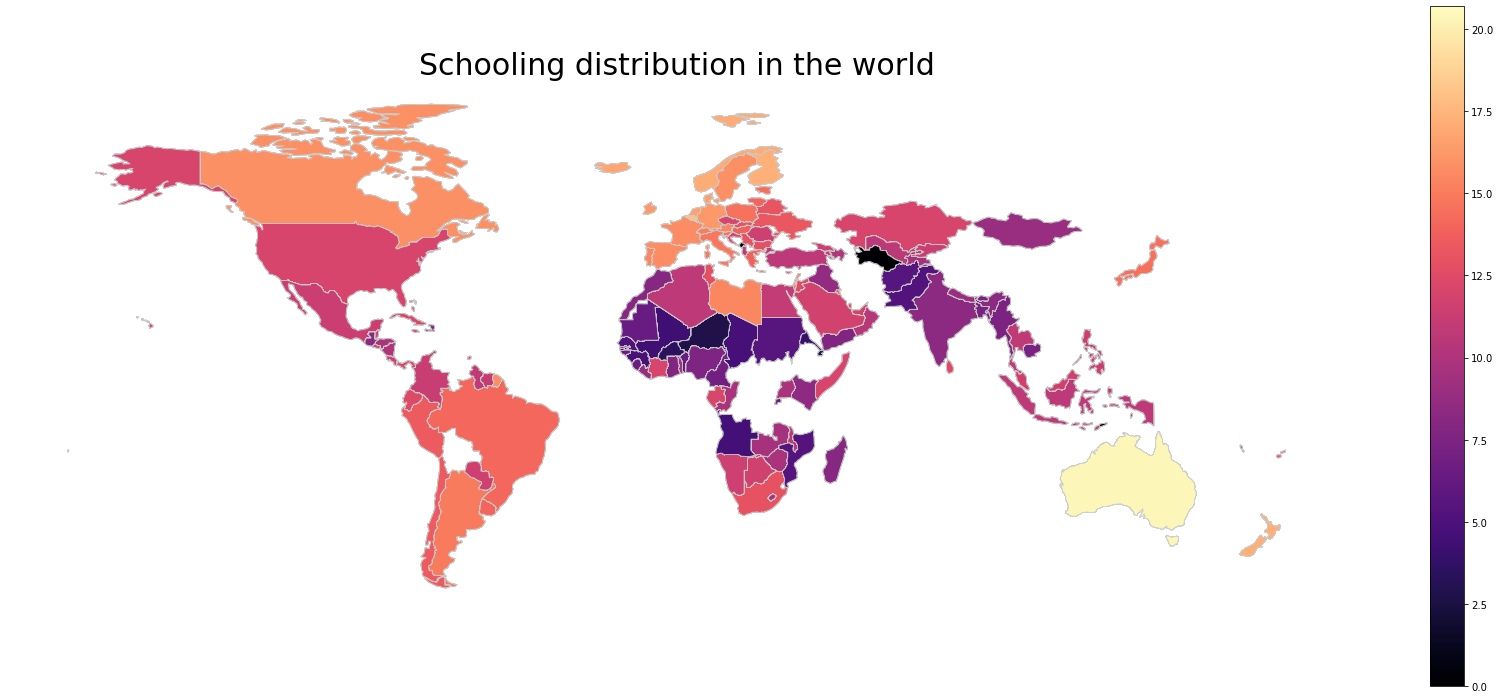

In [291]:
fig, ax = plt.subplots(figsize=(30, 25))

merged_data.plot(column='Schooling', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5})
ax.set_title('Schooling distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see that maximum schooling is in Australia and minimum schooling is in Turkmenistan in Asia and Niger in Africa based on our data.

#### Country vs Population-World  Plot

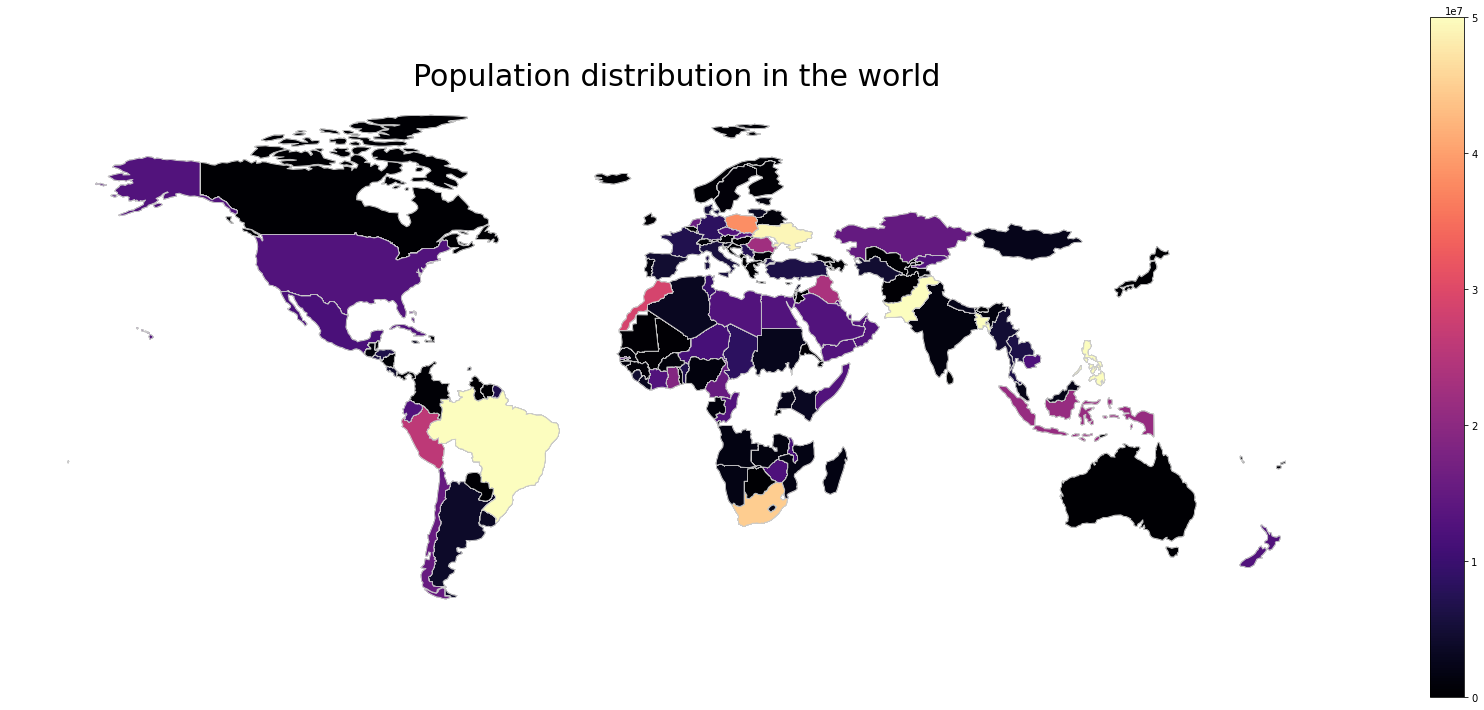

In [292]:
fig, ax = plt.subplots(figsize=(30, 25))

merged_data.plot(column='Population', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5},vmin=0, vmax=50000000)
ax.set_title('Population distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see Brazil, Ukraine, Philippines, Pakistan and Bangladesh have a population above 50 million people as per our given data.

#### Country vs Hepatitis B-World  Plot

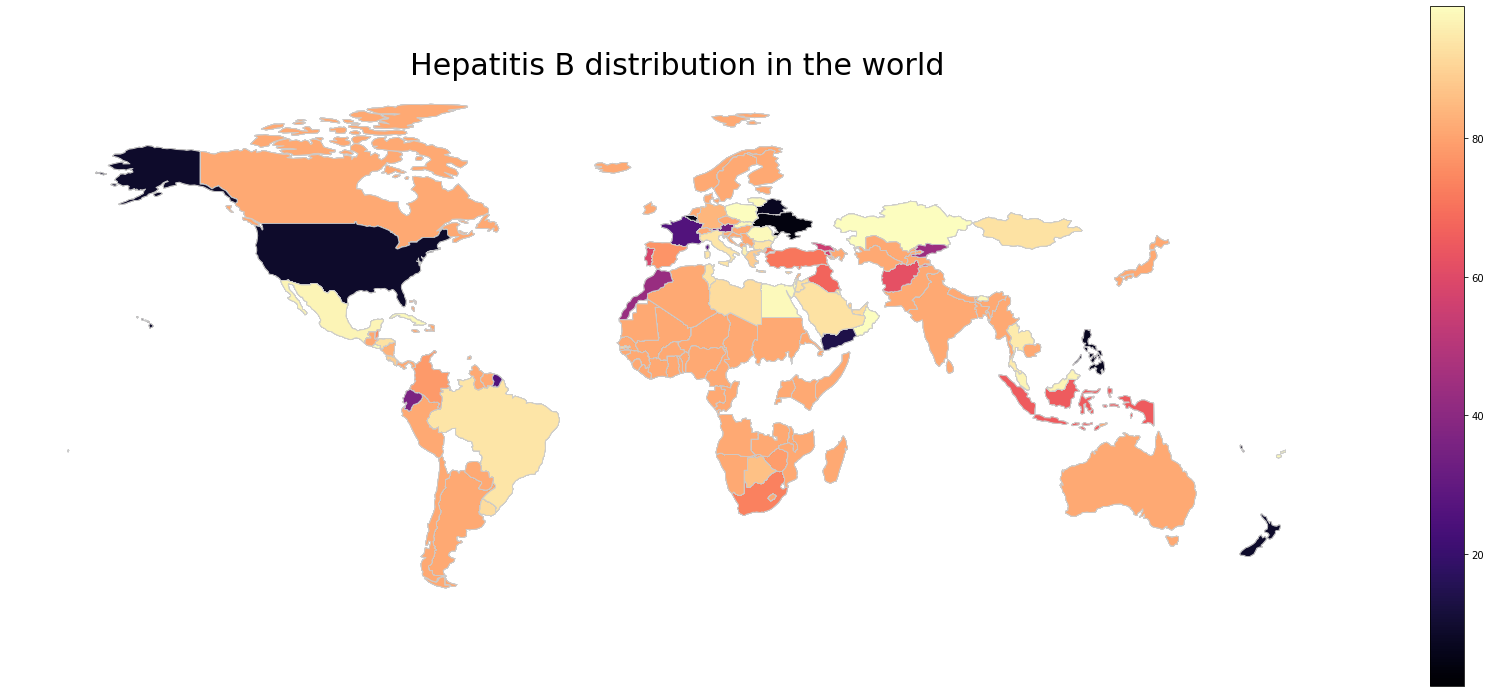

In [293]:
fig, ax = plt.subplots(figsize=(30, 25))
merged_data.plot(column='Hepatitis B', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5})
ax.set_title('Hepatitis B distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see USA, New Zealand, Ukraine, Belarus, Phillipines, Yemen and French Guiana have very low Hepatitis B and Mexico, Cuba, Egypt, Lithuania, Poland, Slovakia, Oman and Kazakhstan have very high Hepatitis B as per the given data.

#### Country vs Measles-World  Plot

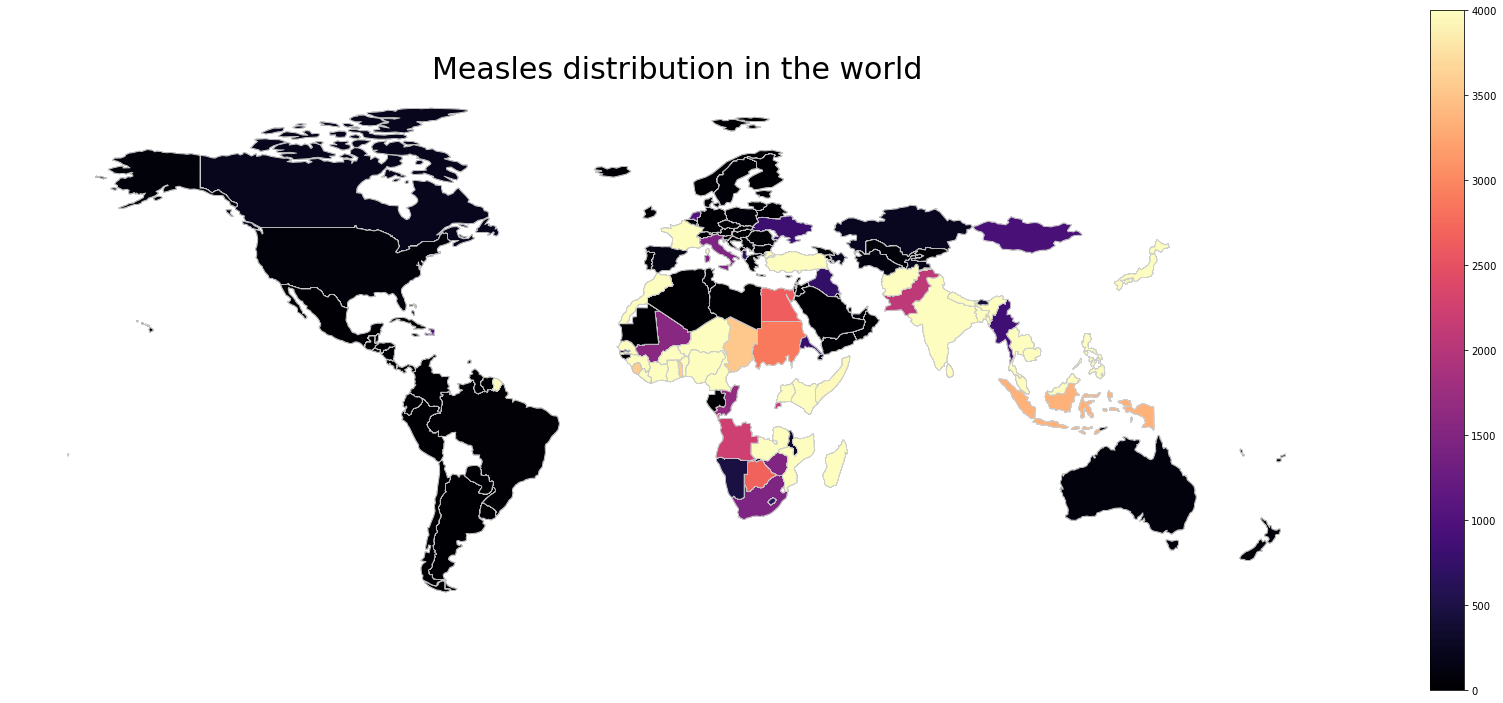

In [294]:
fig, ax = plt.subplots(figsize=(30, 25))

merged_data.plot(column='Measles', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5},vmin=0, vmax=4000)
ax.set_title('Measles distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: We can see Australia, North America and almost entire South America is Measles free and India, Nepal, Thailand, Vietnam, Philippines, Malaysia, Japan, Turkey, Eastern costal Africa and France have maximum Measles based on our data.

#### Country vs Polio-World  Plot

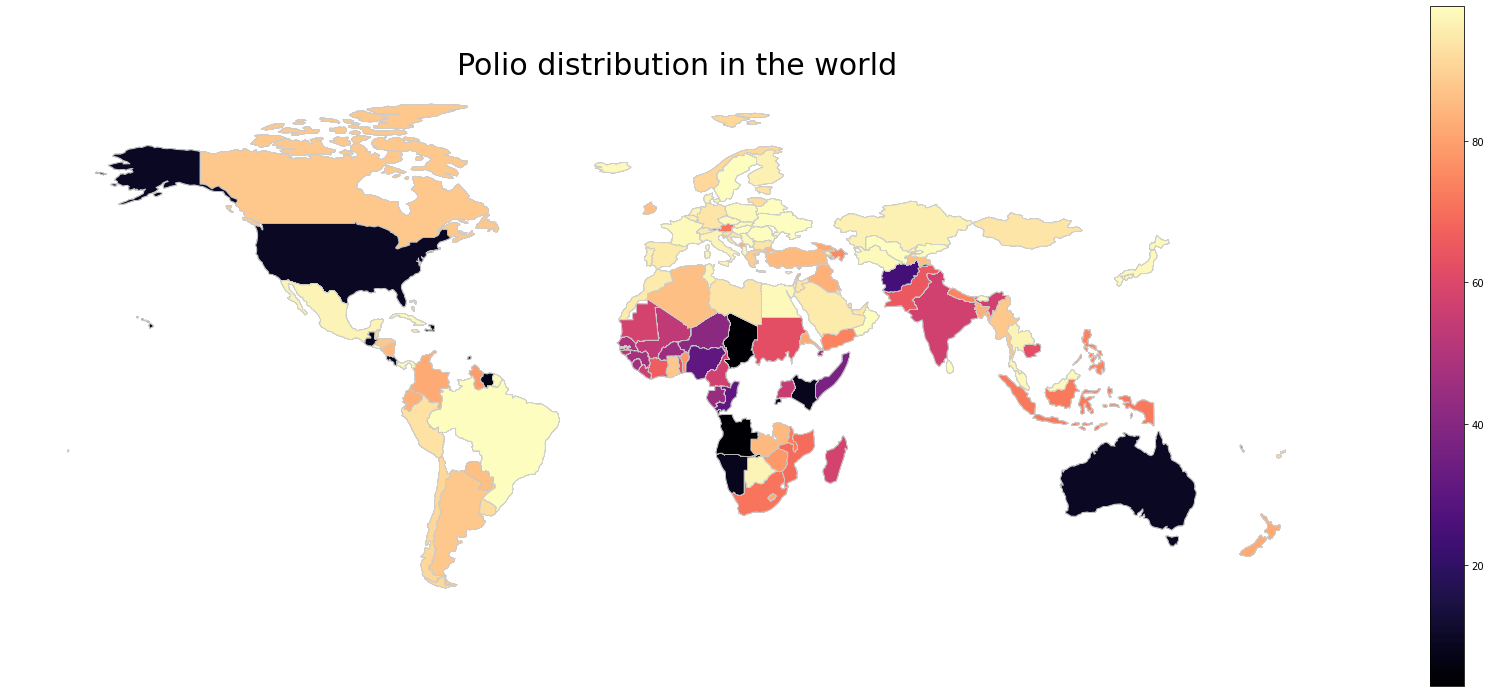

In [295]:
fig, ax = plt.subplots(figsize=(30, 25))

merged_data.plot(column='Polio', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5})
ax.set_title('Polio distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see USA, Australia, Namibia, Angola, Chad, Kenya, Suriname, Costa Rica and Guatemala are almost Polio free and Mexico, Brazil, almost entire Europe, Botswana, Egypt, Japan, Thailand, Malaysia, Oman, Uzbekistan, Iceland and Turkmenistan have very high Polio as per our given data.

#### Country vs Diphtheria-World  Plot

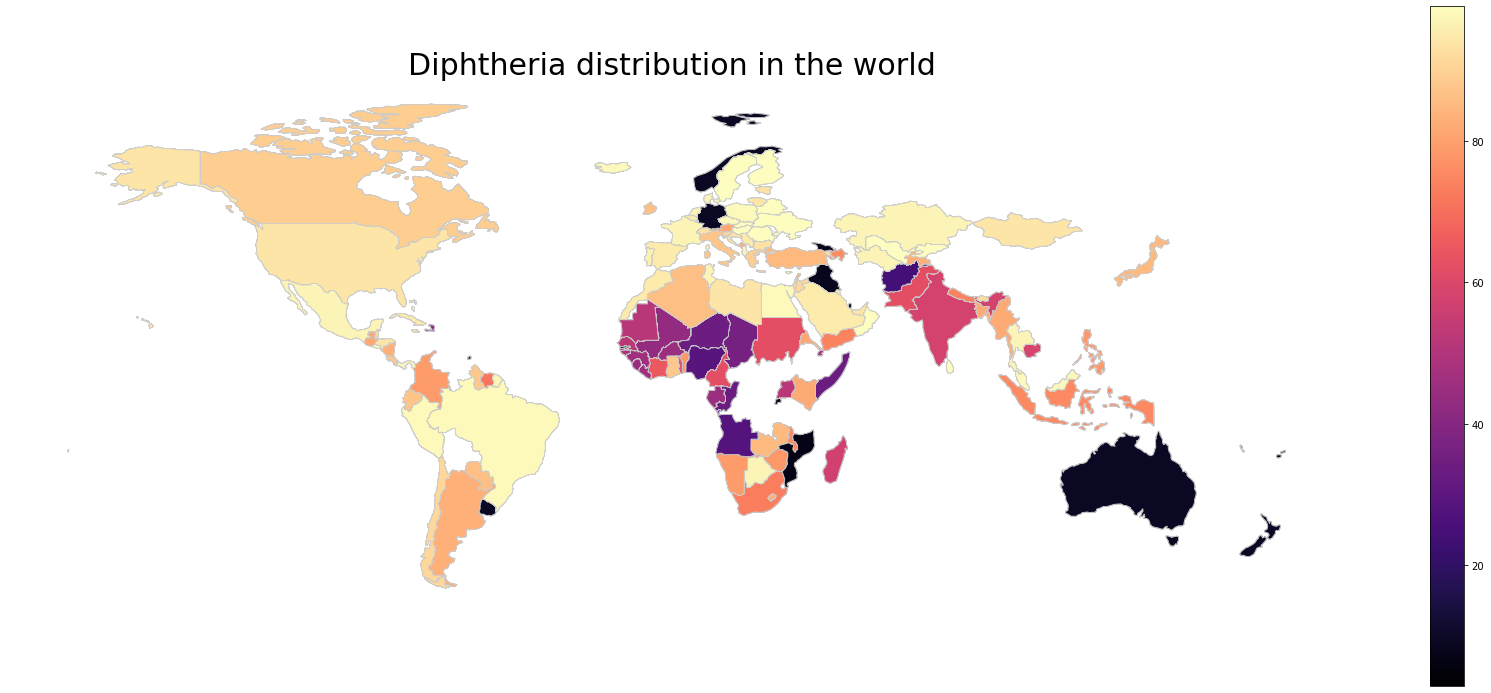

In [296]:
fig, ax = plt.subplots(figsize=(30, 25))

merged_data.plot(column='Diphtheria', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5})
ax.set_title('Diphtheria distribution in the world ',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see Australia, New Zealand, Uruguay, Mozambique, Iraq, Germany, Norway and Geogia are Diphtheria free and Mexico, Brazil, Peru, Oman, Egypt, Thailand, Malaysia, Botswana and most of northern Europe have maximum Diphtheria as per our given data.

#### Country vs HIV/AIDS-World  Plot

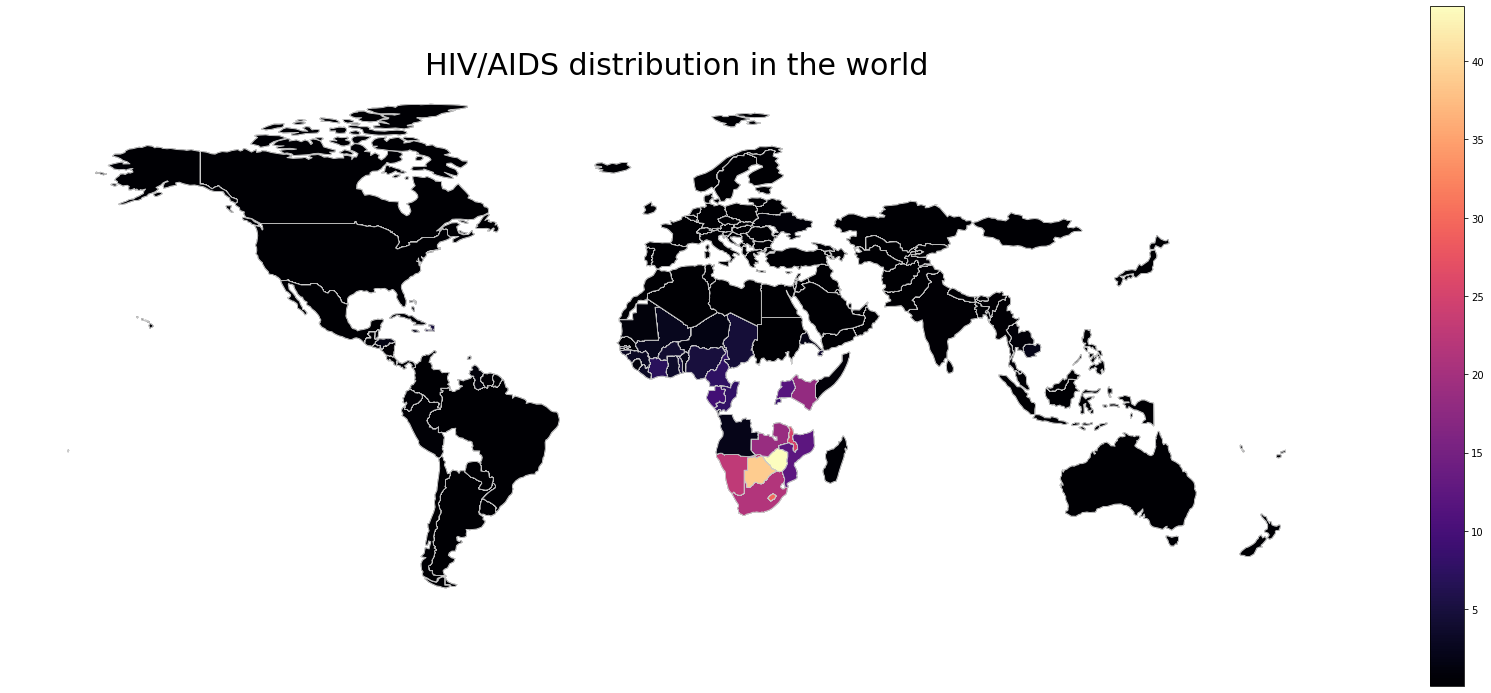

In [297]:
fig, ax = plt.subplots(figsize=(30, 25))

merged_data.plot(column='HIV/AIDS', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5})
ax.set_title('HIV/AIDS distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see majority countries are HIV/AIDS free and maximum HIV/AIDS is in Southern Africa-Zimbabwe as per our data.

#### Country vs under-five deaths -World  Plot

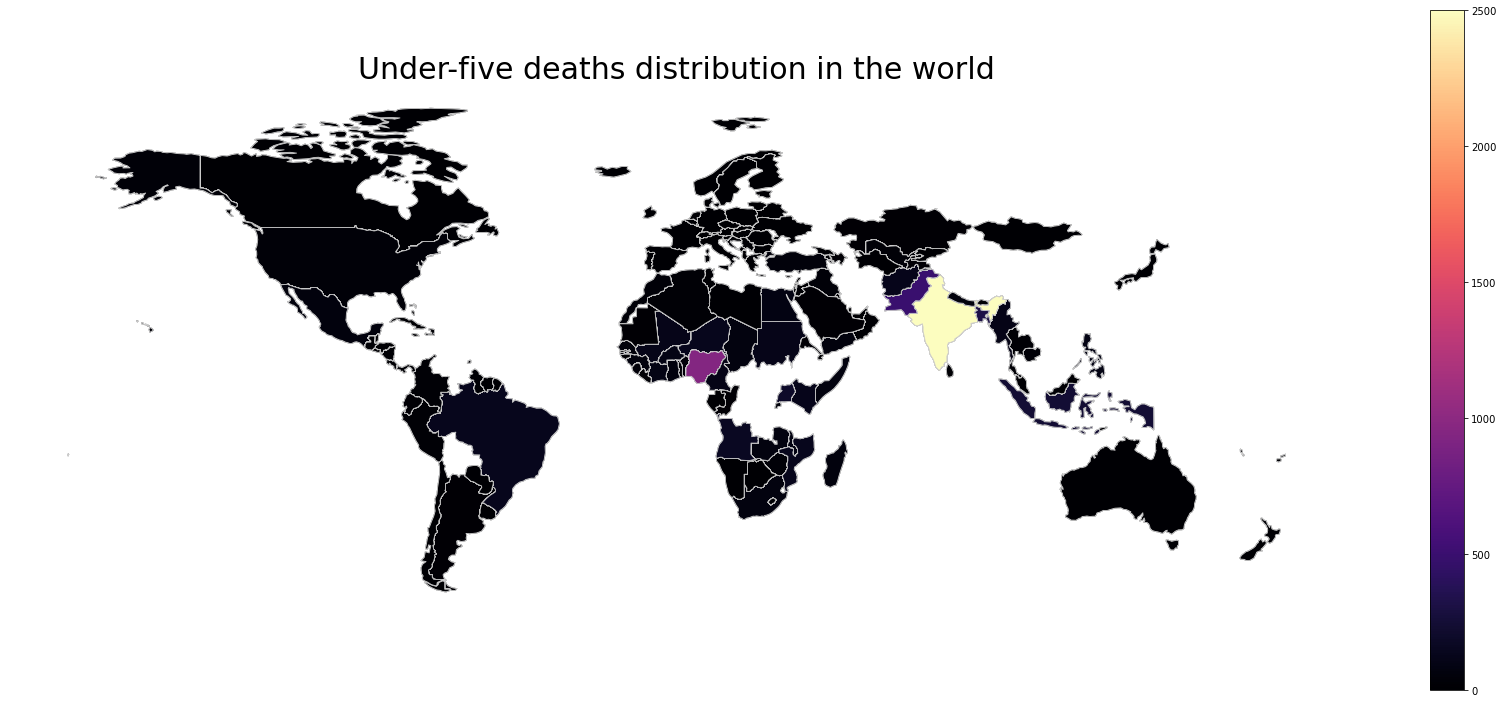

In [298]:
fig, ax = plt.subplots(figsize=(30, 25))

merged_data.plot(column='under-five deaths', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5})
ax.set_title('Under-five deaths distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Majority countries in the world have minimum under five deaths and India has the maximum under five deaths as per our data.

#### Country vs Total expenditure-World  Plot

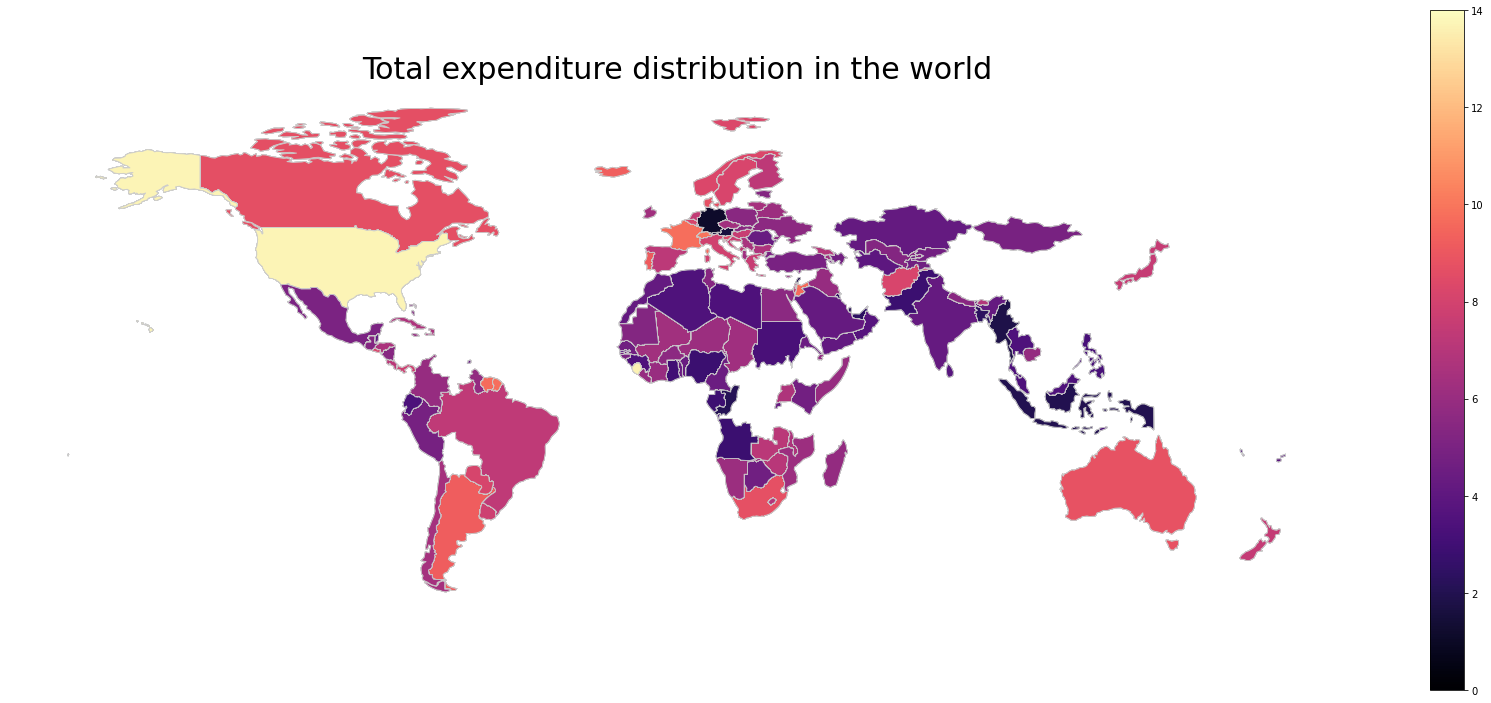

In [299]:
fig, ax = plt.subplots(figsize=(30, 25))

merged_data.plot(column='Total expenditure', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5},vmin=0, vmax=14)
ax.set_title('Total expenditure distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see Indonesia, Bangladesh, Myanmar and Germany habe minimum Total expenditure and USA and Leone have the maximum Total expenditure as per the given data.

#### Country vs GDP-World  Plot

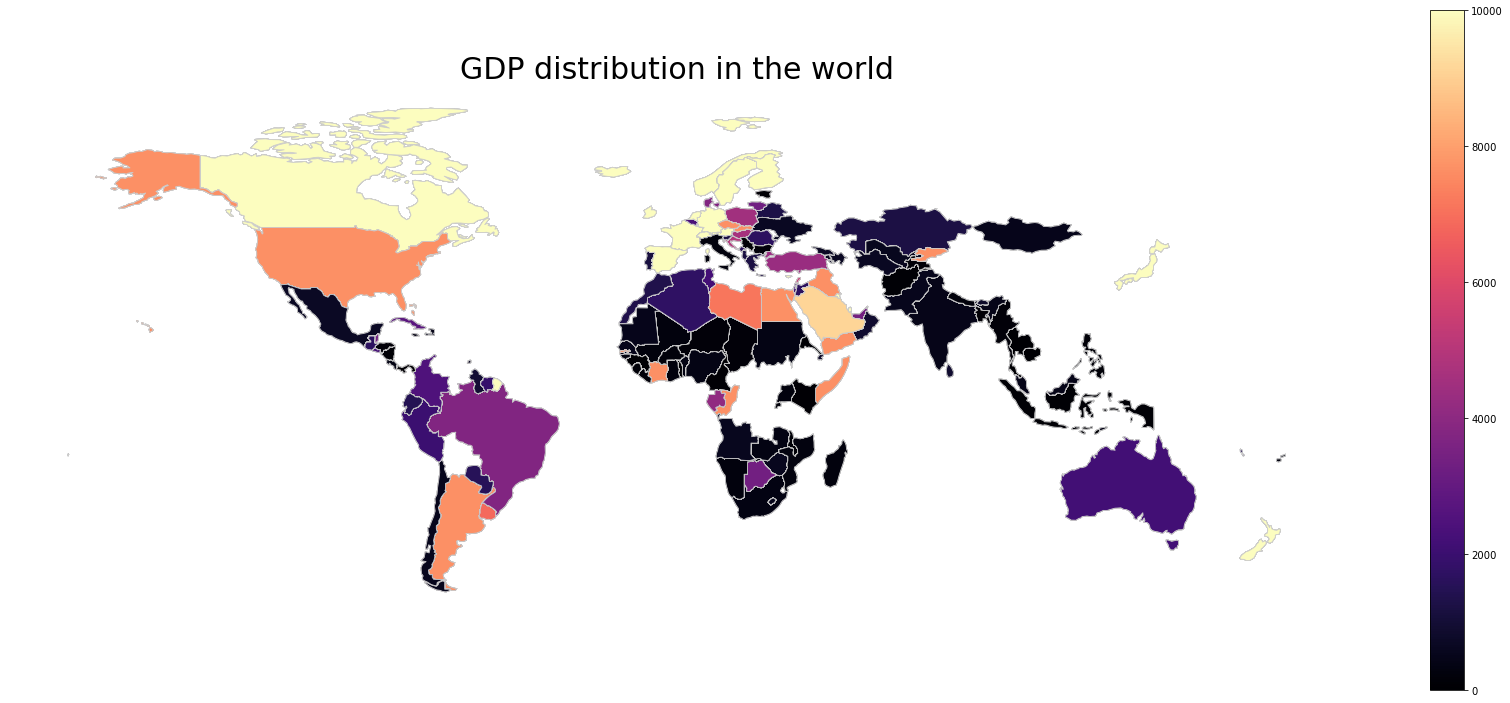

In [300]:
fig, ax = plt.subplots(figsize=(30, 25))

merged_data.plot(column='GDP', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5},vmin=0, vmax=10000)
ax.set_title('GDP distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see maximum GDP is in Canada, Japan, Norway, Sweden, Finland, Iceland, Ireland, New Zealand, France, Spain, Germany and Netherlands and minimum GDP is in southern Northern America, most of Africa, southern Asia, Chile, Portugal, Italy, Greece and Ukraine as per the given data. 

#### Country vs BMI-World  Plot

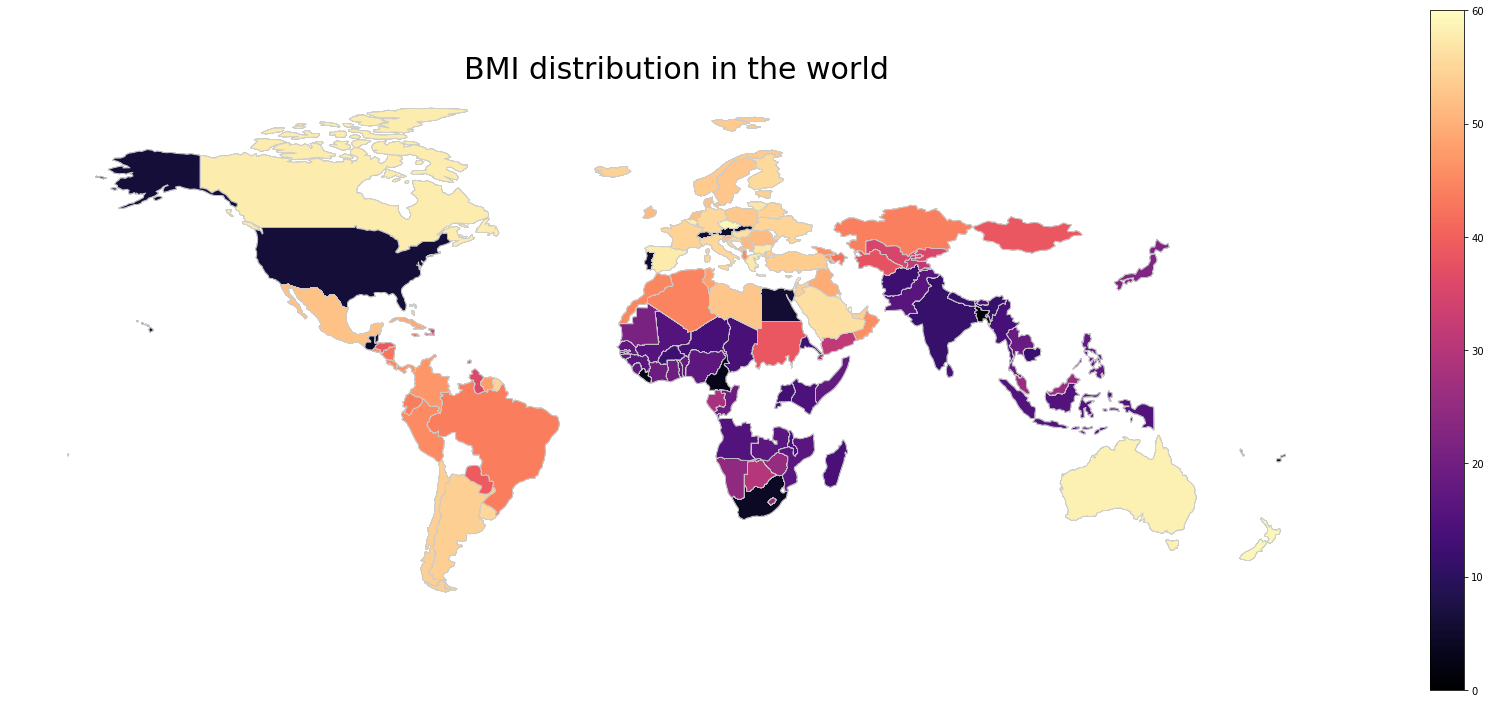

In [301]:
fig, ax = plt.subplots(figsize=(30, 25))
merged_data.plot(column='BMI', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5},vmin=0, vmax=60)
ax.set_title('BMI distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see maximum BMI is in Australia, Canada and New Zealand and minimum BMI is in USA, South Africa, Egypt, Portugal, Liberia, Cameroon, Austia, Slovakia and Switzerland as per the given data.

#### Country vs thinness 1-19 years-World  Plot

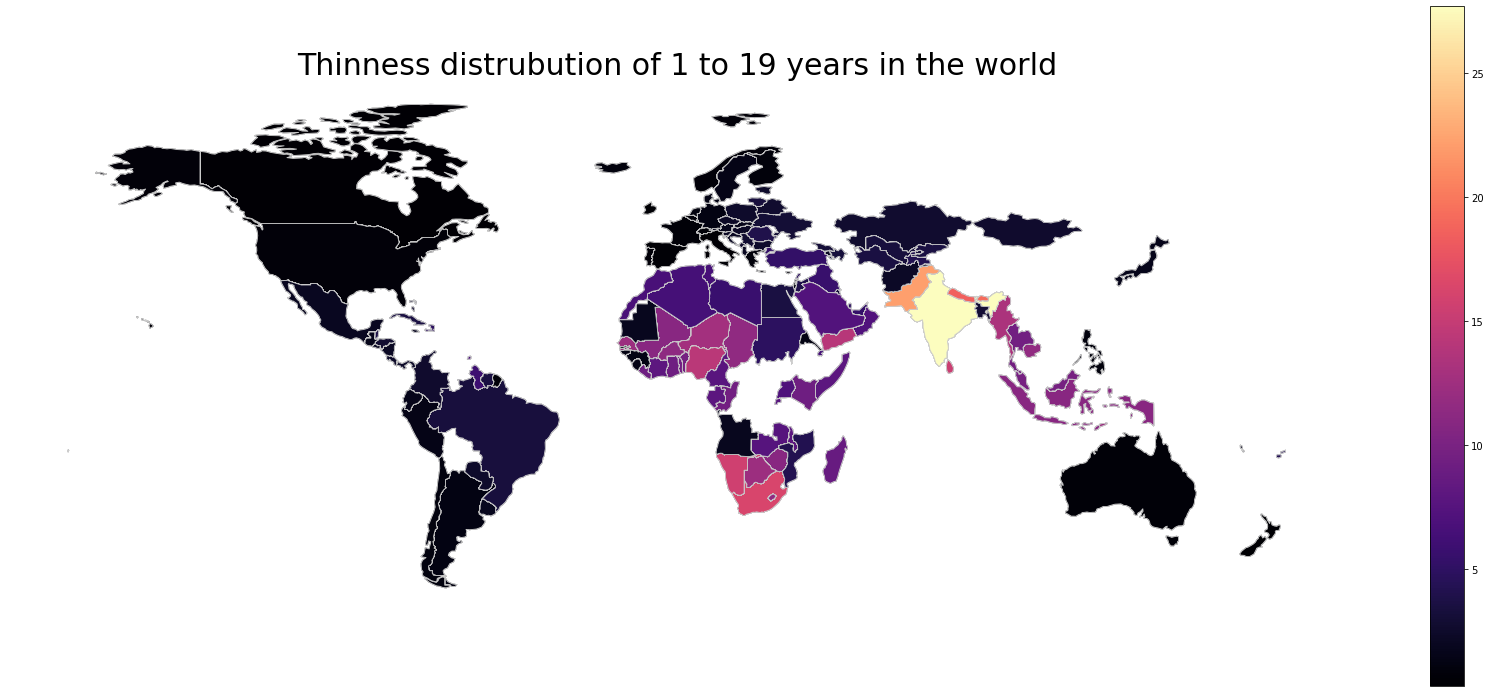

In [302]:
fig, ax = plt.subplots(figsize=(30, 25))
merged_data.plot(column='thinness  1-19 years', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5})
ax.set_title('Thinness distrubution of 1 to 19 years in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see the maximum Thin people between 1 to 19 years is in India and minimum is in entire North America, South America, Australia, New Zealand, entire Europe, Japan, Mozabique, Angola, Mauritania, Afghanistan, Uzbekistan, Turkmenistan, Kazakistan, Azerbaijan and Mongolia as per the given data.

#### Country vs Alcohol-World  Plot

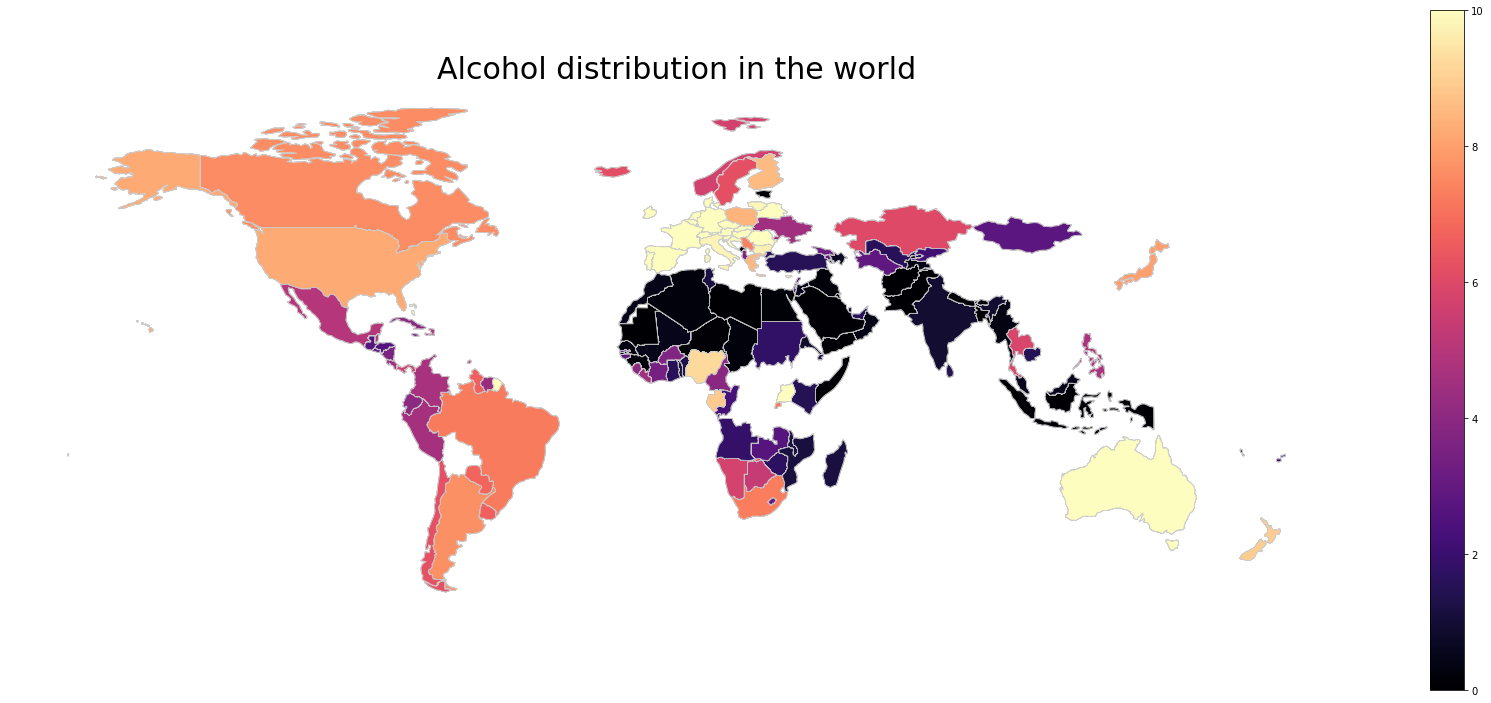

In [303]:
fig, ax = plt.subplots(figsize=(30, 25))
merged_data.plot(column='Alcohol', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5},vmin=0, vmax=10)
ax.set_title('Alcohol distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see maximum Alcohol is in Australia and most of Europe and minimum Alcohol is in northern Africa, Arabic countries, southern Asian countries, Estonia, Madagascar, Mozambique and Somalia as per the given data.

#### Country vs Life Expectancy-World  Plot

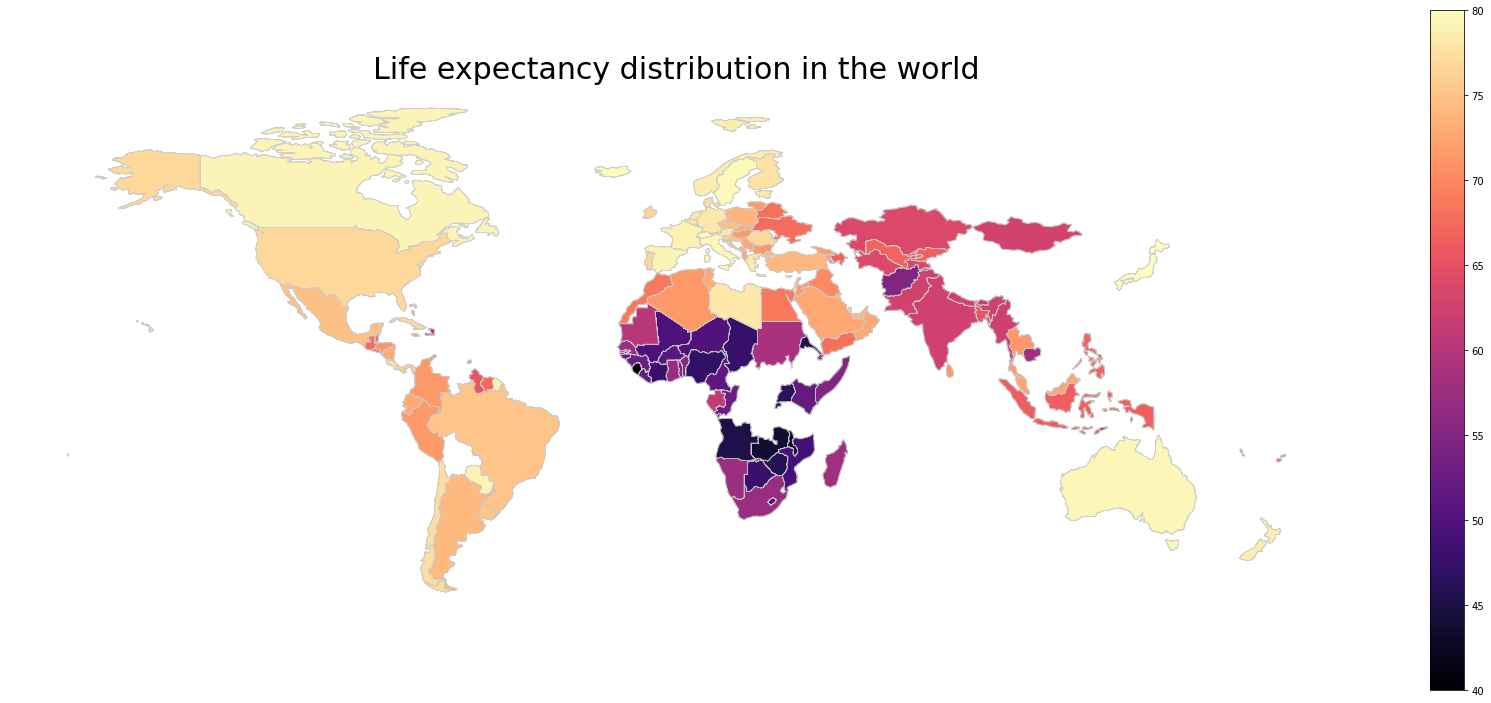

In [304]:
fig, ax = plt.subplots(figsize=(30, 25))
merged_data.plot(column='Life expectancy', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5},vmin=40, vmax=80)
ax.set_title('Life expectancy distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see maximum Life Expectancy is in Canada, Australia, Japan, Sweden and Spain and minimum Life Expectancy is in Leone, Angola, Zambia, Zimbabwe, Malawi, Uganda and Eritrea as per the given data.

#### Country vs Status-World  Plot

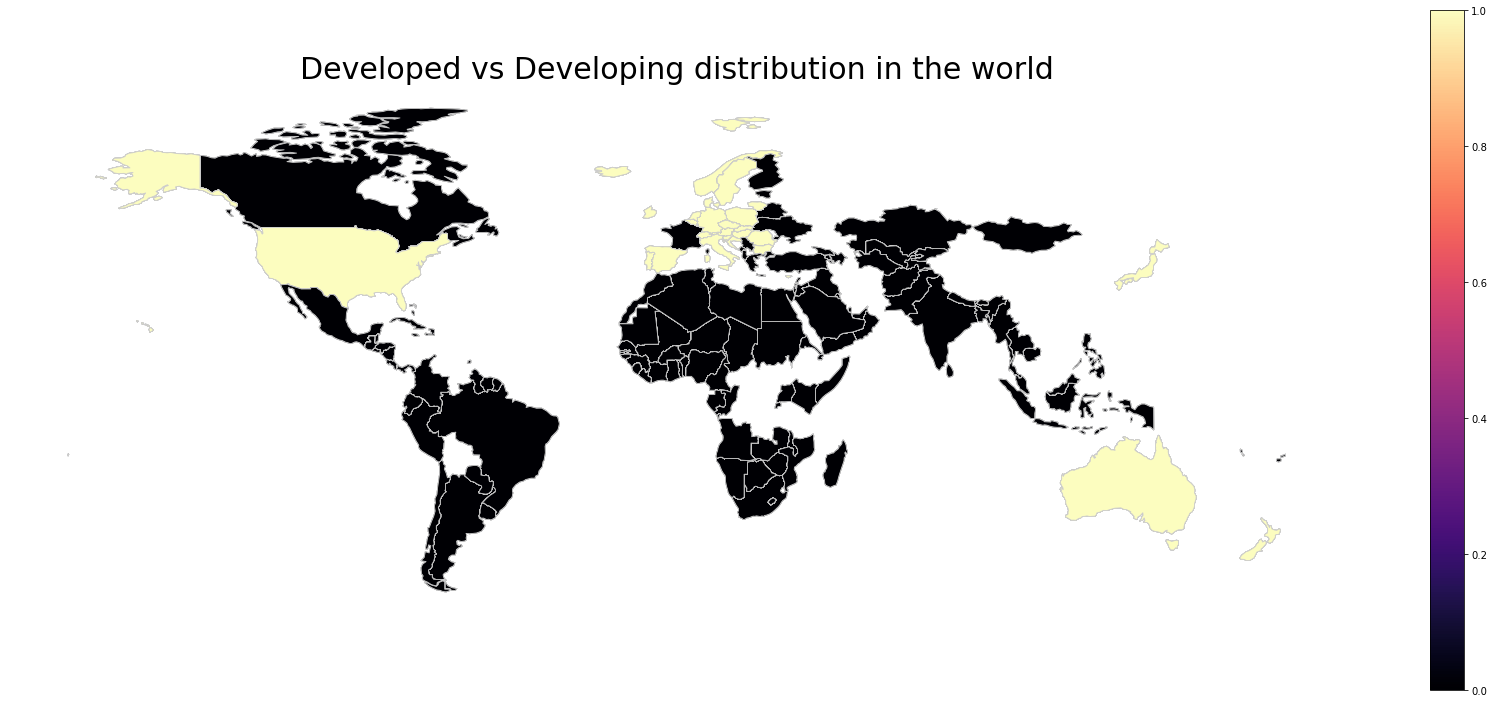

In [305]:
fig, ax = plt.subplots(figsize=(30, 25))
merged_data.plot(column='Status', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,legend_kwds={'shrink': 0.5})
ax.set_title('Developed vs Developing distribution in the world',fontdict={'fontsize':30})
ax.set_axis_off()
plt.show()

Analysis: Here we can see USA, Australia, New Zealand, Japan, Ireland, Iceland, Portugal, Spain, Germany, Switzerland, Belgium, Netherlands, Austria, Italy, Slovakia, Poland, Bulgaria, Hungary, Slovenia, Croatia and Belarus are the developed countries and rest are the developing countries.

### Other Plots

#### BMI vs Life Expectancy - Joint  Plot

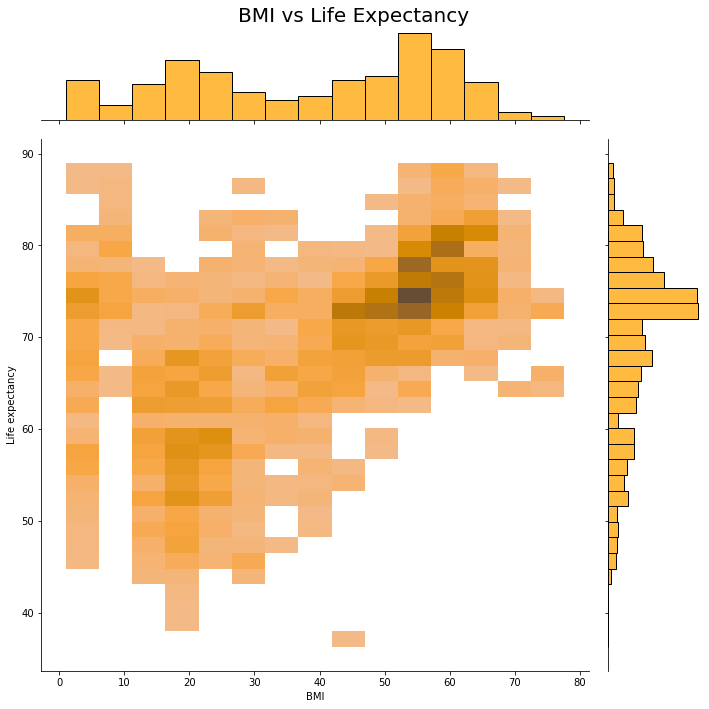

In [306]:
plot=sns.jointplot(x='BMI',y='Life expectancy',data=df,color='orange',kind="hist",height=10)
plot.fig.subplots_adjust(top=.95)
plot.fig.suptitle('BMI vs Life Expectancy',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('BMI',fontdict={'size':20})
plt.ylabel('Life Expectancy',fontdict={'size':20})
plt.show()

Analysis: Here we can see in majority Life Expectancy is between 70 and 80 where BMI is between 50 and 60.

#### Polio vs Diphtheria - Joint  Plot

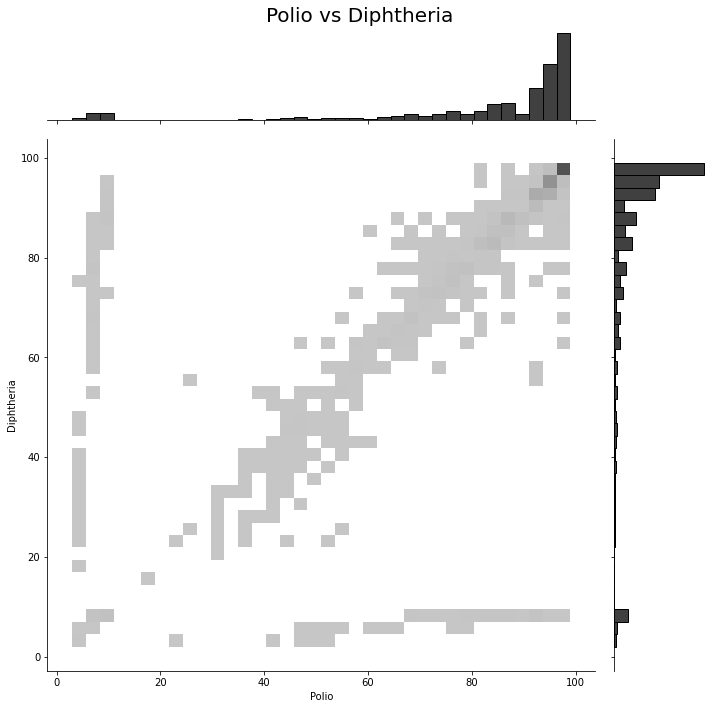

In [307]:
plot=sns.jointplot(x='Polio',y='Diphtheria',data=df,color='black',kind="hist",height=10)
plot.fig.subplots_adjust(top=.95)
plot.fig.suptitle('Polio vs Diphtheria',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Polio',fontdict={'size':20})
plt.ylabel('Diphtheria',fontdict={'size':20})
plt.show()

Analysis: Here we can see majority Diptheria is 100 where Polio is also 100. 

#### Status vs Frequency -  Bar Plot

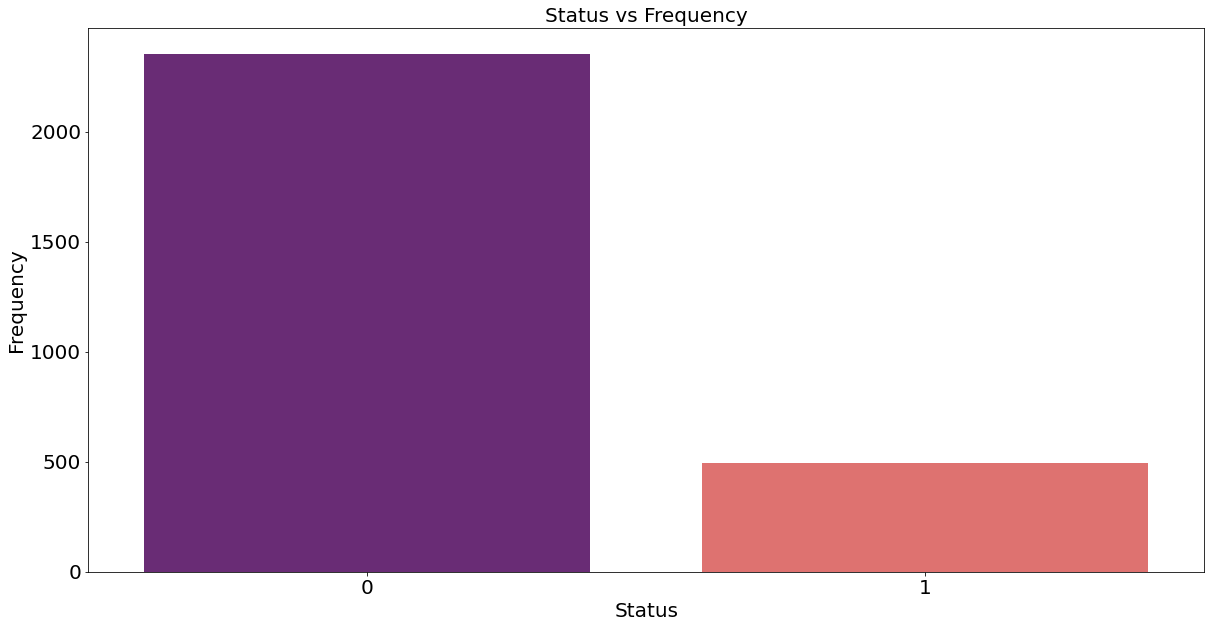

In [308]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Status',data=df,palette="magma")
plt.title('Status vs Frequency',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Status',fontdict={'size':20})
plt.ylabel('Frequency',fontdict={'size':20})
plt.show()

Analysis: Here we can see that majority of the data contains developing data that developed data and we also had seen in the world plot that majority countries were developing.

## Machine Learning

### Regression

Here we would be using Neural Networks in order to perform Regression to predict Life Expectancy.

#### Taking X (input) and Y (output) values of the data 

In [419]:
X=df.drop(['Country','Life expectancy'],axis=1).values
Y=df['Life expectancy'].values

#### Splitting the X and Y into train set and test set

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=124)

#### Initializing the Scaler

In [421]:
scaler=MinMaxScaler()

#### Fitting and Tranforming Training data of X into Scaler based on minimum and maximum

In [422]:
X_train=scaler.fit_transform(X_train)

#### Tranforming Testing data of X by Scaler based on minimum and maximum

In [423]:
X_test=scaler.transform(X_test)

#### Finding the shape of Training data of X

In [424]:
X_train.shape

(2705, 16)

It has 16 columns which would be beneficial to create the neural network.

#### Creating the neural network for regression

In [425]:
model=Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

#### Fitting our training data and testing data for validation into the neural network model

In [426]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=500,verbose=0)

#### Loss and Validation Loss plot

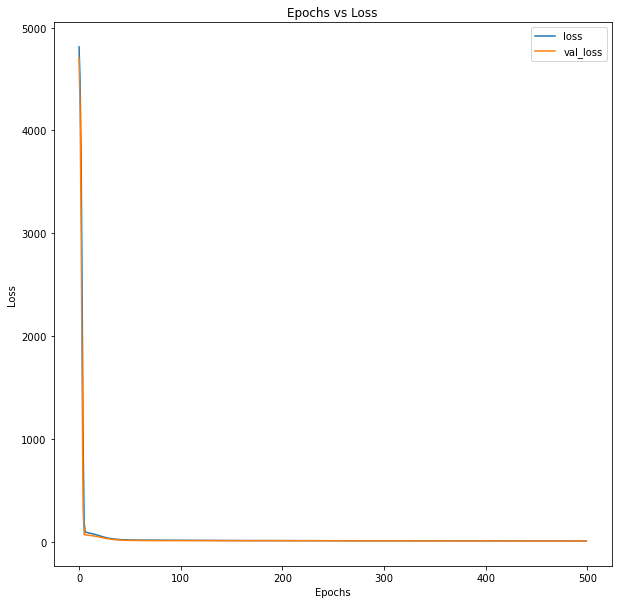

In [427]:
losses=pd.DataFrame(model.history.history)
plt.figure(figsize=(10,10))
plt.plot(losses)
plt.legend(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.show()

Analysis: Here we can see our normal Loss Line and Validation Line are retracing each other and hence our model is perfectly fit.

#### Taking predictions for the X test data from our model

In [428]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


#### Printing the Mean Absolute Error of the model

In [429]:
mae=metrics.mean_absolute_error(y_test,predictions)
print("Mean Absolute error:",mae)

Mean Absolute error: 2.3263136643629814


#### Printing the Mean Squared Error of the model

In [430]:
mse=metrics.mean_squared_error(y_test,predictions)
print("Mean Squared error:",mse)

Mean Squared error: 9.737329606455482


#### Printing the Root Mean Absolute Error of the model

In [431]:
rmse=mse**0.5
print("Root Mean Squared error:",rmse)

Root Mean Squared error: 3.120469452895747


Here our Root Mean Squared error is aprroximately 3 which proves our model is perfectly fit for the model.

#### Taking an example

Here we are taking 2012 India data as an example.

#### Actual Information about India in 2012

In [432]:
df[df['Country']=='India'].iloc[3]

Country                       India
Year                           2012
Status                            0
Population              126365852.0
Hepatitis B                    73.0
Measles                       18668
Polio                          79.0
Diphtheria                     82.0
HIV/AIDS                        0.2
under-five deaths              1400
Total expenditure              4.39
GDP                      1446.98541
BMI                            17.0
thinness  1-19 years           26.9
Alcohol                         3.1
Schooling                      11.3
Life expectancy                67.3
Country_labeled                  71
Name: 1139, dtype: object

#### Creating testing data from the above information and printing the shape of the data

In [433]:
X_India=np.array([[2012,0,126365852.0,73.0,18668,79.0,82.0,0.2,1400,4.39,1466.981541,17.0,26.9,3.1,11.3,71]])
X_India.shape

(1, 16)

#### Scaling the testing data by the Scaler by Maximum and Minimum 

In [434]:
X_India=scaler.fit_transform(X_India)

#### Taking the prediction of X test from our model 

In [435]:
Y_India=model.predict(X_India)

1/1 [==============================] - 0s 23ms/step


#### Printing the prediction

In [436]:
print("Predicted: ",Y_India)

Predicted:  [[60.52883]]


Actual years is 67 years but model is approximately giving me 61 years and hence my model is implemented successfully.

### Binary Classification

Here we will be creating Neural Networks to implement Binary Classification to predict whether is Developed or Developing.

#### Taking X (input) and Y (output) values of the data 

In [453]:
X=df.drop(['Country','Status'],axis=1).values
Y=df['Status'].values

#### Splitting the X and Y into train set and test set

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=124)

#### Fitting and Tranforming Training data of X into Scaler based on minimum and maximum

In [455]:
X_train=scaler.fit_transform(X_train)

#### Tranforming Testing data of X by Scaler based on minimum and maximum

In [456]:
X_test=scaler.transform(X_test)

#### Finding the shape of Training data of X

In [457]:
X_train.shape

(1993, 16)

#### Creating the neural network for binary classification

In [458]:
model=Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy')

#### Fitting our training data and testing data for validation into the neural network model

In [459]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=43,verbose=0)

#### Loss and Validation Loss plot

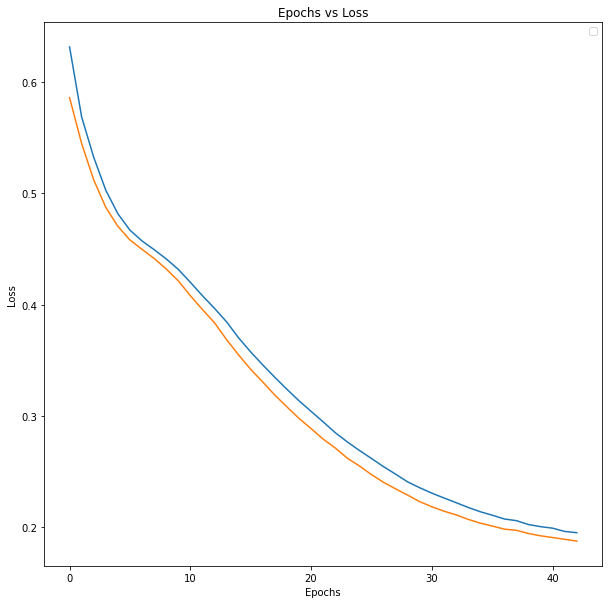

In [460]:
losses=pd.DataFrame(model.history.history)
plt.figure(figsize=(10,10))
plt.legend(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.plot(losses)
plt.show()

Analysis: Here we can see Validation Line has been below our Loss line hence our model is perfectly fit.

#### Taking predictions for the X test data from our model

In [461]:
predictions = (model.predict(X_test)>0.5).astype("int32")

27/27 [==============================] - 0s 1ms/step


#### Printing the confusion matrix between actual and predicted results

In [462]:
print(confusion_matrix(y_test,predictions))

[[671  33]
 [ 30 121]]


#### Printing the classification report for the binary classification

In [463]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       704
           1       0.79      0.80      0.79       151

    accuracy                           0.93       855
   macro avg       0.87      0.88      0.87       855
weighted avg       0.93      0.93      0.93       855



Since our model is able to achieve 93% accuracy using this neural network, our model has successfully predicted the Status of the country.

### Multiclass Classification

Here we will be creating Neural Network to implement Multiclass Classification to predict the country.

#### One hot encoding the target variable-Country

In [464]:
df_count=df['Country_labeled']
one_hot=pd.get_dummies(df_count,columns=['Country'])
one_hot.head(1)

0    1    2    3    4    5    6    7    8    9    ...  168  169  170  171  \
0    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   172  173  174  175  176  177  
0    0    0    0    0    0    0  

[1 rows x 178 columns]

#### Taking X (input) and Y (output) values of the data 

In [465]:
X=df.drop(['Country','Year','Country_labeled'],axis=1)
Y=one_hot
X=pd.get_dummies(X,columns=['under-five deaths'])

We are also one hot encoding under five deaths because it will help the model in further predicting the Country.

#### Shape of X

In [466]:
X.shape

(2848, 241)

#### Shape of Y

In [467]:
Y.shape

(2848, 178)

#### Splitting the X and Y into train set and test set

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.025, random_state=124)

Test size is 0.025 because here we have 178 unique features and 2848 rows in Y and so maximum test data can be 178/2848 = 0.0625 or 6.25%. So just to achieve better accuracy 0.025 or 2.5 % of the data is taken as test size.  

#### Fitting and Tranforming Training data of X into Scaler based on minimum and maximum

In [469]:
X_train=scaler.fit_transform(X_train)

#### Tranforming Testing data of X by Scaler based on minimum and maximum

In [470]:
X_test=scaler.transform(X_test)

#### Creating the neural network for multiclass classification

In [471]:
model=Sequential()
model.add(Dense(241,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(175,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(178,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy')

#### Fitting our training data and testing data for validation into the neural network model

In [472]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=1024,epochs=1750,verbose=0)

#### Loss and Validation Loss plot

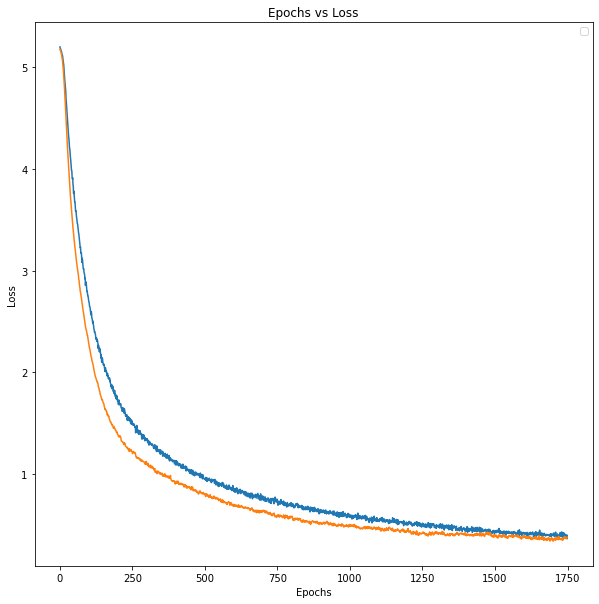

In [473]:
losses=pd.DataFrame(model.history.history)
plt.figure(figsize=(10,10))
plt.legend(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.plot(losses)
plt.show()

Analysis: Here we can see Validation Line has been below our Loss line hence our model is perfectly fit.

#### Taking predictions for the X test data from our model

In [474]:
predictions = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


#### Shape of predictions

In [475]:
predictions.shape

(72, 178)

Here the predictions contain predicted probabilities for each Country for each row of testing data. 

#### Creating maximum probability of Country array

In [476]:
res=np.argmax(predictions,axis=1)
res

array([128, 135,  25,   7, 110,  76, 144,  39,   7, 145, 151, 126, 128,
        75,  38, 148, 152, 142,  29,  75, 160,  52, 152,  73,  90, 139,
        17,   5,  85,  15,  37,  69, 166, 119,  17,  94,  53, 142,  40,
        45, 172,  14,  27, 175,   2, 162,  84,  54, 158, 163, 150,  13,
       126,  15,  96,  38,  32,  98, 123,  30, 126,  35,  84,  60,  87,
        65, 154, 116,  15, 165,  21,  77], dtype=int64)

Now we have got our predicted country for each row of test data.

#### Shape of test data of Y

In [477]:
y_test.shape

(72, 178)

Since we had one hot encoded it earlier we need the labels back for each row of it.

#### Creating labeled array from the test data to get actual Country

In [478]:
columns_with_true = y_test.idxmax(axis=1)
real=columns_with_true.values
real

array([128, 135,  25,   7, 110,  36, 144,  39,   7, 145, 151, 126, 128,
        75,  38, 148, 152, 142,  29,  75, 160,  52, 152, 162,  90, 139,
        17,   5,  85,  15,  37,  69, 166,  85,  17,  94,  53, 142,  40,
        45, 172,  14,  27, 175,   2, 162,  84,  54, 158, 163,  21,  13,
       126,  15,  96,  38,  32,  98, 123,  30, 126,  89,  84,  60,  87,
        65,   9, 116,  15, 165,  21,  77], dtype=int64)

Now we have got the actual Country for each row of test data.

#### Printing heatmap of confusion matrix between actual and predicted Country

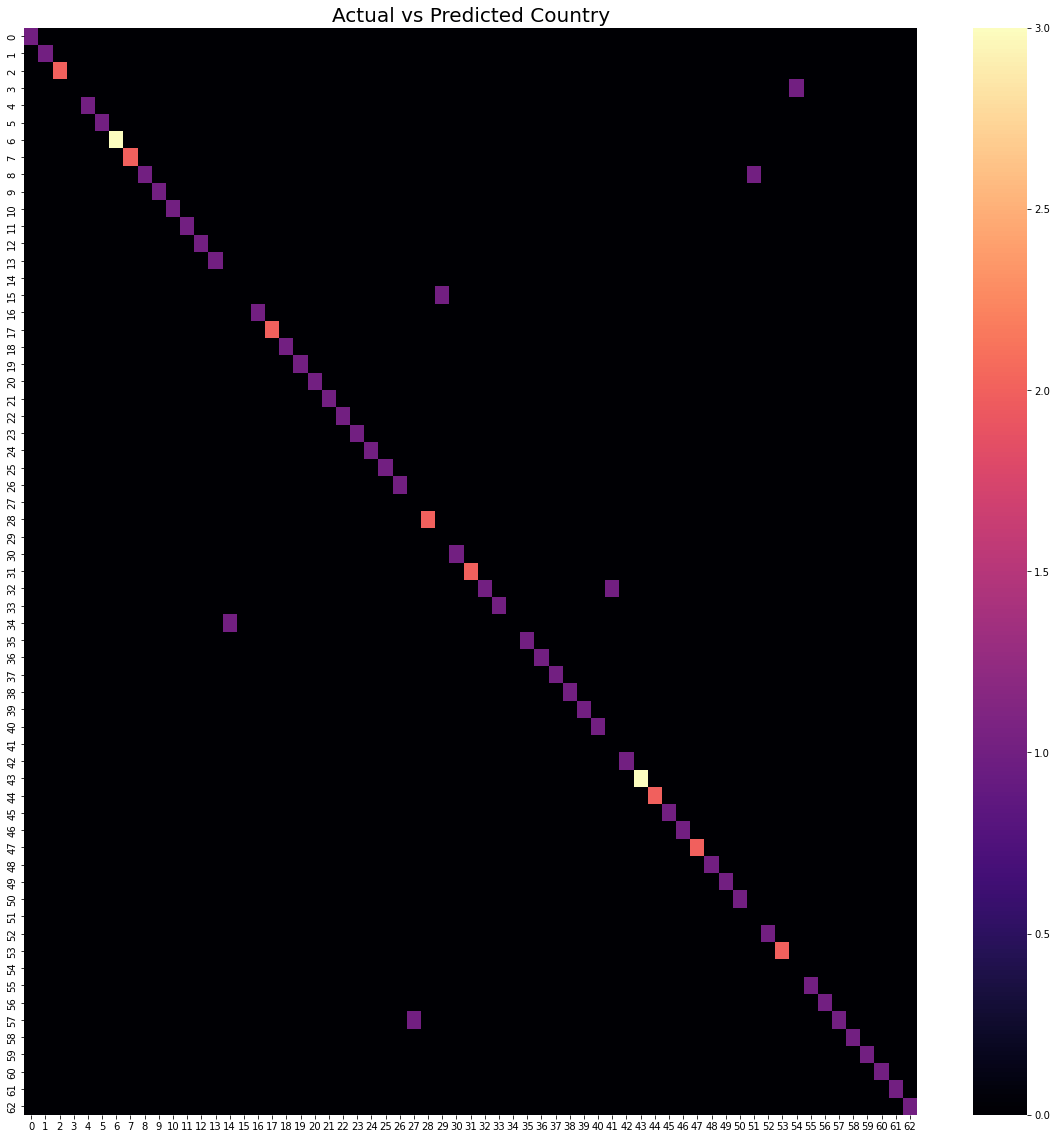

In [479]:
plt.figure(figsize=(20,20))
cmat=confusion_matrix(real,res)
plt.title('Actual vs Predicted Country',fontsize=20)
sns.heatmap(cmat,cmap='magma')
plt.show()

Here we can see we are getting 6 countries wrong which is very less in respect to 72 rows we had taken for testing. Here the colour tells that how much data was for that country in the test data.

#### Printing the F1 Accuracy of our model

In [481]:
report=classification_report(real,res)
f1_score = report.split('\n')[66].split()[1]
print(f"F1 Accuracy: {f1_score}")

F1 Accuracy: 0.92


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\

Here we can see our model is able to achieve 92% accuracy from this neural network, hence our model has successfully predicted the Country.

## Conclusion

1. Our Regression Model has 2-3 years of Mean Absolute Error and Root Mean Square Error for predicting Life Expectancy of the Country.
2. Our Binary Classification model has 93% accuracy in predicting the Status of the Country.
3. Our Multiclass Classification model has 92% accuracy in predicting the Country.